# What is the impact of agricultural corn field expansion rate on deforestation rate in countries?


By Platypus

## About Corn Production
### History of Corn
The most commonly accepted theory is that maize, also known as corn nowadays,  was originated in the Mesoamerican region, now called Mexico and Central America. A study by Matsuoka et al. (2002) has demonstrated that maize arose from a single domestication in Southern Mexico about 9000 years ago. The term ‘maize’ come from the word ‘mahiz’ of Taino language of the Caribbean islands, which became ‘maiz’, a word brought by Columbus from the Carribean to Spain. Domesticated corn would not exist if it was not for the humans who cultivated and developed it. The most published hypothesis about its wild progenitor : teosinte hypothesis. Teosinte provided a useful food source and ancient people cultivated it. It eventually muted into the solid ear type of maize that we know today.

Source : [Hossain, Firoz & Muthusamy, Vignesh & Bhat, Jayant & Jha, Shailendra & Zunjare, Rajkumar & Das, Abhijit & Sarika, Konsam & Kumar, Rajesh. (2016).](https://www.researchgate.net/publication/308086213_Maize)

### How it spread worldwide and its importance in global agriculture
From Mexico maize spread north into the Southwestern United States and south down the coast to Peru. About 1000 years ago, as Indian people migrated north to the eastern woodlands of present day North America, they brought corn with them. After the discovery of the Americas, corn quickly disseminated into Europe, Asia, and Africa, and has become the leading global staple cereal in terms of annual production exceeding 1 billion metric tons.

Source : [Olaf Erenstein & Moti Jaleta & Kai Sonder & Khondoker Mottaleb & B.M. Prasanna, 2022.
"Global maize production, consumption and trade: trends and R&D implications," Food Security: The Science, Sociology and Economics of Food Production and Access to Food, Springer;The International Society for Plant Pathology, vol. 14(5), pages 1295-1319, October.](https://link.springer.com/content/pdf/10.1007/s12571-022-01288-7.pdf)



In [1]:
# CSV files
filepath = 'https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/'
csv_forest = filepath + "Deforest.xlsx"
csv_cornland = filepath + 'FAOSTAT_data_en_10-2-2024.csv'
csv_landcover = filepath + "FAOSTAT_data_en_11-18-2024.csv"

## Getting the Data

### Installing packages

In [2]:
pip install wbdata

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pycountry

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import libraries

In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import numpy as np
import pycountry
import plotly.express as px

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Deforestation Data

In [5]:
#deforest_data = pd.read_excel(filepath + 'Deforestat.xlsx')
deforest_data = pd.read_excel(csv_forest)
deforest_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194,NaN,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037,NaN,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722,NaN,NaN


In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
# Check if there is a columns only filled with 0
zero_counts = (deforest_data == 0).sum()
zero_counts.unique() #nb of unique rows only filled with 0

array([0, 4])

In [8]:
# Define the columns containing years
year_columns = [col for col in deforest_data.columns if col.isdigit()]

# Count the number of 0 values in each row across the year columns
deforest_data['Zero_Count'] = (deforest_data[year_columns] == 0).sum(axis=1)

# Filter rows where the count of 0 values is greater than a threshold (e.g., more than 1)
countries_with_multiple_zeros = deforest_data[deforest_data['Zero_Count'] > 1]['Country Name']

# Display the country names with multiple 0 values
print(countries_with_multiple_zeros)


84     Gibraltar
149       Monaco
179        Nauru
200        Qatar
Name: Country Name, dtype: object


In [9]:
# Drop the rows where 'Country Name' is in the list of countries with multiple zeros
deforest_data = deforest_data[~deforest_data['Country Name'].isin(countries_with_multiple_zeros)]

# Drop the 'Zero_Count' column used for filtering
deforest_data = deforest_data.drop(columns=['Zero_Count'])

deforest_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194,NaN,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037,NaN,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,NaN,NaN
263,South Africa,ZAF,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.235127,14.205121,14.175115,14.145109,14.115103,14.085097,14.055091,14.025085,NaN,NaN
264,Zambia,ZMB,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.802392,61.549254,61.295955,61.042885,60.789707,60.536515,60.283337,60.030150,NaN,NaN


In [10]:
#Dropping the column that are not necessary for the analysis
data_topic = deforest_data["Indicator Name"].unique()[0]
deforest_data = deforest_data.drop(["Indicator Name","Indicator Code"], axis = 1) #Dropping the column
print(f"Dataset topic: {data_topic}")

Dataset topic: Forest area (% of land area)


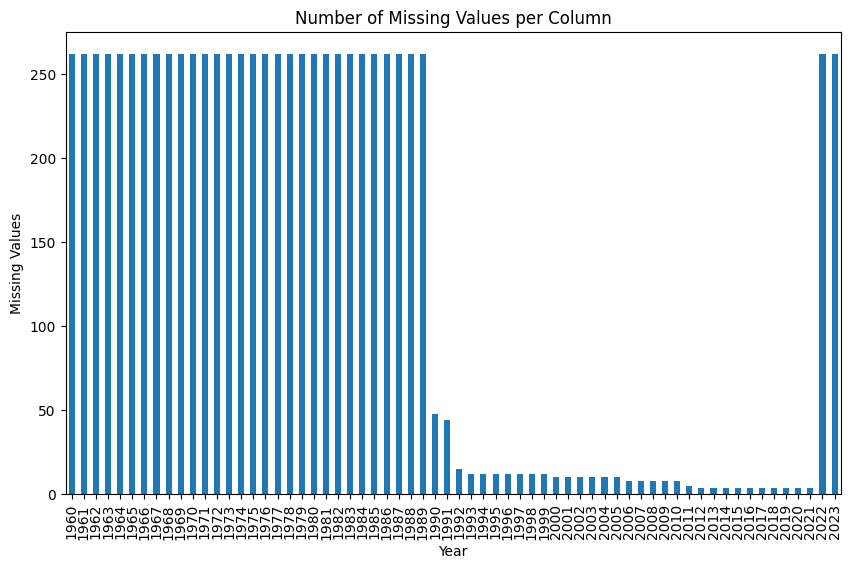

In [11]:
#Historigram to see the nb of missing values per columns
# We will use regex to find all columns that represent years (assuming years are 4-digit numbers starting with '19' or '20').
year_columns = [col for col in deforest_data.columns if re.match(r'^\d{4}$', col)]

#Potting the missing values
plt.figure(figsize=(10, 6))  # You can adjust the (width, height) as needed
missing_values = deforest_data[year_columns].isnull().sum()
missing_values.plot(kind='bar', title='Number of Missing Values per Column', xlabel='Year', ylabel='Missing Values')

# Show the plot
plt.show()

In [12]:
all_missing_columns = deforest_data[year_columns].isnull().all()
# Filter out the columns that are entirely missing
columns_with_all_missing = all_missing_columns[all_missing_columns].index.tolist()
# Result: We don't have data for the years: 1960-1989 & 2022,2023

# Drop the columns that have all missing value
deforest_data = deforest_data.drop(columns_with_all_missing ,axis = 1)

#Converting the years to integers
deforest_data.rename(columns={col: int(col) for col in year_columns}, inplace=True)

#We want the data starting from 2000
columns_from_2000 = [col for col in deforest_data.columns if isinstance(col, int) and col >= 2000]

# Filter the DataFrame to include only the columns from the year 2000 onwards
data_with_desired_years = deforest_data[columns_from_2000]

#Joining the dataframes
final_deforest_data = deforest_data[["Country Name","Country Code"]].join(data_with_desired_years)
final_deforest_data.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333
1,Africa Eastern and Southern,AFE,34.717473,34.537463,34.357452,34.177441,33.654274,33.475977,33.297802,33.119504,...,31.890654,31.680635,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194
2,Afghanistan,AFG,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
3,Africa Western and Central,AFW,21.595284,21.503156,21.411029,21.318902,21.226775,21.134648,21.042520,20.950393,...,20.498099,20.410143,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037
4,Angola,AGO,62.331443,61.886219,61.440995,60.995770,60.550546,60.105322,59.660098,59.214874,...,56.988751,56.543526,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722


In [13]:
#Preliminary cleaning
final_deforest_data["Country Name"] = final_deforest_data["Country Name"] + " " + final_deforest_data["Country Code"]
final_deforest_data.reset_index(drop = True, inplace = True)

#Dropping some of the columns for clearer structure
df_cleaned = final_deforest_data.drop(columns='Country Code')

# Reshape the data using the melt function to create a long format
df_long = df_cleaned.melt(id_vars=['Country Name'], var_name='Year', value_name='Values')

# Convert 'Year' column to numeric if necessary (remove '.0' from the years)
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

#Adding the country code
df_long["Country Code"] = df_long["Country Name"].apply(lambda val:val.split(" ")[-1])
df_long["Country Name"] = df_long["Country Name"].apply(lambda val: " ".join(val.split(" ")[:-1]))

#Ordering the columns
df_long = df_long[["Country Name","Country Code","Year","Values"]]

df_long.head()

,Country Name,Country Code,Year,Values
0,Aruba,ABW,2000,2.333333
1,Africa Eastern and Southern,AFE,2000,34.717473
2,Afghanistan,AFG,2000,1.852782
3,Africa Western and Central,AFW,2000,21.595284
4,Angola,AGO,2000,62.331443


/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/1281065338.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_count_per_country = df_long.groupby('Country Name').apply(lambda x: x.isna().sum())["Values"]


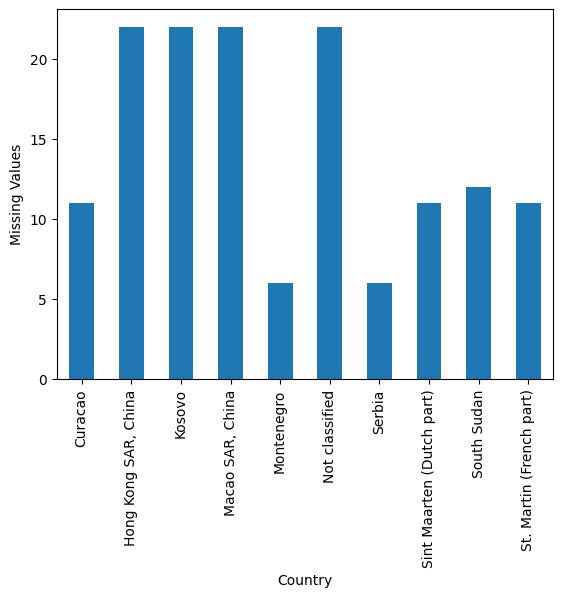

In [14]:
# Count the number of NaN values for each country
nan_count_per_country = df_long.groupby('Country Name').apply(lambda x: x.isna().sum())["Values"]

# Plot a bar plot of the 'nan_count_per_country' DataFrame
nan_count_per_country[nan_count_per_country > 0].plot(kind = 'bar', xlabel='Country', ylabel='Missing Values')

#These countries can be dropped
countries_dropped = nan_count_per_country[nan_count_per_country > 0].index


In [15]:
country_lst = nan_count_per_country[nan_count_per_country > 0].index.to_list()

#Dropping all the data related to countries above
df_cleaned = df_long[~df_long['Country Name'].isin(country_lst)]
df_cleaned.head()

,Country Name,Country Code,Year,Values
0,Aruba,ABW,2000,2.333333
1,Africa Eastern and Southern,AFE,2000,34.717473
2,Afghanistan,AFG,2000,1.852782
3,Africa Western and Central,AFW,2000,21.595284
4,Angola,AGO,2000,62.331443


In [16]:
#Data availability per country
data_avl = df_cleaned.groupby("Country Name").count()["Values"].unique()[0] #Data point per country
print(f"Data point per country: {data_avl}")

Data point per country: 22


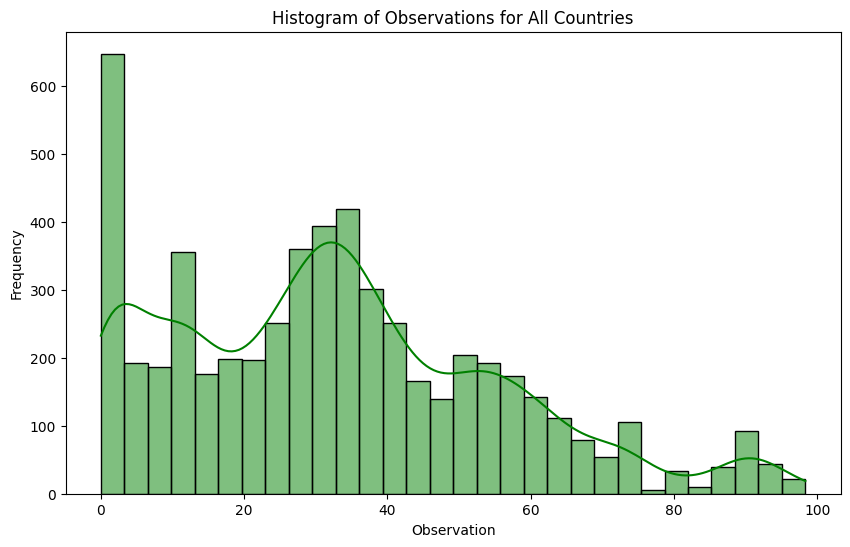

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Values"], bins=30, kde=True, color='green')
plt.title('Histogram of Observations for All Countries')
plt.xlabel('Observation')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [18]:
df_cleaned["Values"].skew()

np.float64(0.5836839696069517)

In [19]:
# Function to get ISO-3 country code from country name
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

In [20]:
df_cleaned['iso3'] = df_cleaned['Country Name'].apply(get_iso3)
df_cleaned

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/3388532243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['iso3'] = df_cleaned['Country Name'].apply(get_iso3)


,Country Name,Country Code,Year,Values,iso3
0,Aruba,ABW,2000,2.333333,ABW
1,Africa Eastern and Southern,AFE,2000,34.717473,None
2,Afghanistan,AFG,2000,1.852782,AFG
3,Africa Western and Central,AFW,2000,21.595284,None
4,Angola,AGO,2000,62.331443,AGO
...,...,...,...,...,...
5758,Samoa,WSM,2021,57.982014,WSM
5760,"Yemen, Rep.",YEM,2021,1.039832,None
5761,South Africa,ZAF,2021,14.025085,ZAF
5762,Zambia,ZMB,2021,60.030150,ZMB


In [21]:
df_cleaned[df_cleaned['iso3'].isnull()]

,Country Name,Country Code,Year,Values,iso3
1,Africa Eastern and Southern,AFE,2000,34.717473,None
3,Africa Western and Central,AFW,2000,21.595284,None
7,Arab World,ARB,2000,3.551072,None
23,"Bahamas, The",BHS,2000,50.935065,None
36,Central Europe and the Baltics,CEB,2000,32.469472,None
...,...,...,...,...,...
5751,St. Vincent and the Grenadines,VCT,2021,73.179487,None
5752,"Venezuela, RB",VEN,2021,52.347781,None
5754,Virgin Islands (U.S.),VIR,2021,57.314286,None
5757,World,WLD,2021,31.177049,None


In [22]:
# Reverting to previous data before dropping and then manually resolving country mismatches
country_mapping = {
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'United States',
    'Venezuela, RB': 'Venezuela',
    'Bahamas, The': 'Bahamas',
    'Congo, Dem. Rep.':'Congo, The Democratic Republic of the',
    'Congo, Rep.': 'Congo',
    'Turkiye': 'Türkiye',
    "Cote d'Ivoire":"Côte d'Ivoire",
    'St. Lucia':'Saint Lucia',
    "Korea, Dem. People's Rep." : "Korea, Democratic People's Republic of",
    'Korea, Rep.': 'Korea, Republic of',
    'Lao PDR':"Lao People's Democratic Republic",
    'Gambia, The': 'Gambia',
    'Egypt, Arab Rep.': 'Egypt',
    'Iran, Islamic Rep.': 'Iran, Islamic Republic of',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
    'Micronesia, Fed. Sts.': 'Micronesia, Federated States of',
    'Virgin Islands (U.S.)':'Virgin Islands, U.S.',
    'Yemen, Rep.':'Yemen',
    'Macao SAR, China': 'Macao',
    'St. Martin (French part)':'Saint Martin (French part)',
    'Curacao':'Curaçao',
    'Hong Kong SAR, China': 'Hong Kong'
    # You can add more mappings if necessary
}
df_cleaned['Country Name'] = df_cleaned['Country Name'].replace(country_mapping)

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/692176500.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Country Name'] = df_cleaned['Country Name'].replace(country_mapping)


In [23]:
# Lookup the country by ISO3 code
country = pycountry.countries.get(alpha_3='VAT')

# Display the country name
country.name

'Holy See (Vatican City State)'

In [24]:
country_not_country = [
    'Africa Eastern and Southern',
    'Africa Western and Central',
    'Central Europe and the Baltics',
    'Upper middle income',
    'East Asia & Pacific (IDA & IBRD countries)',
    'East Asia & Pacific',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (IDA & IBRD countries)',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)',
    'Early-demographic dividend',
    'High income',
    'IBRD only',
    'IDA & IBRD total',
    'IDA blend',
    'IDA only',
    'IDA total',
    'Late-demographic dividend',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Least developed countries: UN classification',
    'Low & middle income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (IDA & IBRD countries)',
    'Middle income',
    'Low income',
    'North America',
    'OECD members',
    'Other small states',
    'Pacific island small states',
    'Post-demographic dividend',
    'Small states',
    'South Asia',
    'Sub-Saharan Africa (IDA & IBRD countries)',
    'Sub-Saharan Africa (excluding high income)',
    'Pre-demographic dividend',
    'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa',
    'West Bank and Gaza',
    'Caribbean small states',
    'Channel Islands',
    'Arab World',
    'Middle East & North Africa (excluding high income)',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'Eastern and Southern Africa',
    'Western and Central Africa',
    'Not classified',
    'World'
]

df_cleaned = df_cleaned[~df_cleaned['Country Name'].isin(country_not_country)]

In [25]:
df_cleaned['iso3'] = df_cleaned['Country Name'].apply(get_iso3)

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/1747897946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['iso3'] = df_cleaned['Country Name'].apply(get_iso3)


In [26]:
#Check that we have no country mismatch anymore
df_cleaned[df_cleaned['iso3'].isnull()]

,Country Name,Country Code,Year,Values,iso3


In [27]:
df_cleaned = df_cleaned.dropna()
df_cleaned = df_cleaned.reset_index()
df_def = df_cleaned
df_def.head()

,index,Country Name,Country Code,Year,Values,iso3
0,0,Aruba,ABW,2000,2.333333,ABW
1,2,Afghanistan,AFG,2000,1.852782,AFG
2,4,Angola,AGO,2000,62.331443,AGO
3,5,Albania,ALB,2000,28.076642,ALB
4,6,Andorra,AND,2000,34.042553,AND


In [28]:
df_def.drop('index', axis=1, inplace=True)

In [29]:
df_def.rename(columns={'Values':'% of Forest Area', 'Country Name': 'country'}, inplace=True)
df_def.head()

,country,Country Code,Year,% of Forest Area,iso3
0,Aruba,ABW,2000,2.333333,ABW
1,Afghanistan,AFG,2000,1.852782,AFG
2,Angola,AGO,2000,62.331443,AGO
3,Albania,ALB,2000,28.076642,ALB
4,Andorra,AND,2000,34.042553,AND


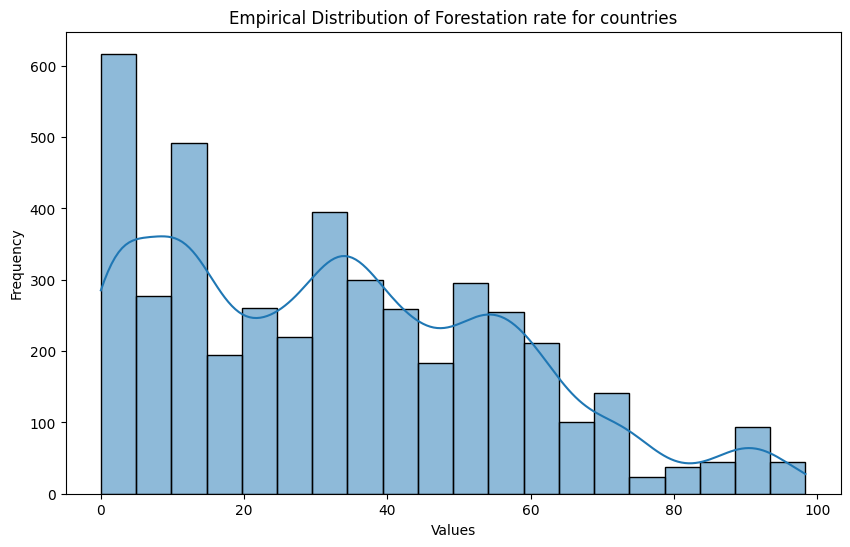

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df_def['% of Forest Area'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Forestation rate for countries')

# Show the plot
plt.show()

In [31]:
df_def['% of Forest Area'].skew()

np.float64(0.5032493738541235)

In [32]:
print(df_def['Year'].min(),df_def['Year'].max())

2000 2021


### Cornfield Data

In [33]:
corn_field_data = pd.read_csv(csv_cornland)
corn_field_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1961,1961,ha,500000,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1962,1962,ha,500000,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1963,1963,ha,500000,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1964,1964,ha,505000,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1965,1965,ha,500000,A,Official figure,NaN


In [34]:
#Filtering the data between 2000 and 2021
corn_field_data = corn_field_data[(corn_field_data['Year'] >= 2000) & (corn_field_data['Year'] <= 2021)]
corn_field_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
39,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2000,2000,ha,96000,A,Official figure,NaN
40,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2001,2001,ha,80000,A,Official figure,NaN
41,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2002,2002,ha,100000,A,Official figure,NaN
42,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2003,2003,ha,250000,A,Official figure,NaN
43,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2004,2004,ha,250000,A,Official figure,NaN


In [35]:
corn_field_data["Note"].unique()

array([nan, 'Unofficial figure'], dtype=object)

In [36]:
corn_field_data["Flag Description"].unique()

array(['Official figure', 'Estimated value', 'Imputed value',
       'Figure from international organizations',
       'Missing value (data cannot exist, not applicable)'], dtype=object)

In [37]:
corn_field_data = corn_field_data[(corn_field_data["Flag Description"] == "Official figure") & (corn_field_data["Note"] != "Unofficial figure")]

In [38]:
#Unique country amount: Does the number of countires in this data match with deforestation data?
print("Number of countries in the corn field dataset: ",len(corn_field_data["Area"].unique()))

Number of countries in the corn field dataset:  162


In [39]:
corn_field_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
39,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2000,2000,ha,96000,A,Official figure,NaN
40,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2001,2001,ha,80000,A,Official figure,NaN
41,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2002,2002,ha,100000,A,Official figure,NaN
42,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2003,2003,ha,250000,A,Official figure,NaN
43,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2004,2004,ha,250000,A,Official figure,NaN


In [40]:
#filter only the relevant columns
df_corn = corn_field_data
df_corn = df_corn[["Area","Value","Year"]]
df_corn

,Area,Value,Year
39,Afghanistan,96000,2000
40,Afghanistan,80000,2001
41,Afghanistan,100000,2002
42,Afghanistan,250000,2003
43,Afghanistan,250000,2004
...,...,...,...
9543,Zimbabwe,1099945,2017
9544,Zimbabwe,1155075,2018
9545,Zimbabwe,991354,2019
9546,Zimbabwe,1018884,2020


In [41]:
areas_to_exclude = df_corn[df_corn["Value"] == 0]["Area"].unique() #These countries include 0 values
#Exclude these countries completely
df_corn = df_corn[~df_corn['Area'].isin(areas_to_exclude)]
df_corn

,Area,Value,Year
39,Afghanistan,96000,2000
40,Afghanistan,80000,2001
41,Afghanistan,100000,2002
42,Afghanistan,250000,2003
43,Afghanistan,250000,2004
...,...,...,...
9543,Zimbabwe,1099945,2017
9544,Zimbabwe,1155075,2018
9545,Zimbabwe,991354,2019
9546,Zimbabwe,1018884,2020


In [42]:
#Missing values
df_corn.isna().sum()

Area     0
Value    0
Year     0
dtype: int64

In [43]:
value_counts_per_area = df_corn.groupby("Area")["Value"].count()

# Filter to get only the areas where the count is not equal to 22
areas_not_equal_to_22 = value_counts_per_area[value_counts_per_area != 22].index
areas_not_equal_to_22

Index(['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Congo',
       'Côte d'Ivoire', 'Democratic People's Republic of Korea',
       'Democratic Republic of the Congo', 'Denmark', 'Eritrea', 'Eswatini',
       'Fiji', 'French Guiana', 'Gambia', 'Ghana', 'Guatemala',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Kuwait',
       'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malaysia',
       'Maldives', 'Mauritania', 'Montenegro', 'Mozambique', 'Namibia',
       'New Caledonia', 'Nigeria', 'Oman', 'Papua New Guinea', 'Puerto Rico',
       'Rwanda', 'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Serbia',
       'Serbia and Montenegro', 'Sierra Leone', 'South Sudan', 'Sri Lanka',
       'Sudan', 'Sudan (former)', 'Sweden', 'Tajikistan', 'Thailand',
 

In [44]:
df_corn = df_corn[~df_corn["Area"].isin(areas_not_equal_to_22)]
df_corn

,Area,Value,Year
39,Afghanistan,96000,2000
40,Afghanistan,80000,2001
41,Afghanistan,100000,2002
42,Afghanistan,250000,2003
43,Afghanistan,250000,2004
...,...,...,...
9481,Zambia,1433944,2017
9482,Zambia,1086006,2018
9483,Zambia,841693,2019
9484,Zambia,1333519,2020


In [45]:
df_corn['iso3'] = df_corn['Area'].apply(get_iso3)
df_corn[df_corn['iso3'].isnull()]

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/3983791102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corn['iso3'] = df_corn['Area'].apply(get_iso3)


,Area,Value,Year,iso3
1057,Bolivia (Plurinational State of),307292,2000,None
1058,Bolivia (Plurinational State of),306118,2001,None
1059,Bolivia (Plurinational State of),310465,2002,None
1060,Bolivia (Plurinational State of),295509,2003,None
1061,Bolivia (Plurinational State of),313849,2004,None
...,...,...,...,...
7175,Republic of Korea,15074,2017,None
7176,Republic of Korea,15472,2018,None
7177,Republic of Korea,14840,2019,None
7178,Republic of Korea,15633,2020,None


In [46]:
# Reverting to previous data before dropping and then manually resolving country mismatches
country_mapping_corn = {
    'Bolivia (Plurinational State of)':'Bolivia, Plurinational State of',
    'China, Taiwan Province of':'Taiwan, Province of China',
    'China': 'China_',
    'China, mainland':'China',
    'Democratic Republic of the Congo':'Congo, The Democratic Republic of the',
    'Iran (Islamic Republic of)':'Iran, Islamic Republic of',
    'Micronesia (Federated States of)': 'Micronesia, Federated States of',
    'Netherlands (Kingdom of the)':'Netherlands',
    'Republic of Korea': 'Korea, Republic of',
    'Venezuela (Bolivarian Republic of)':'Venezuela, Bolivarian Republic of',
    # You can add more mappings if necessary
}

df_corn['Area'] = df_corn['Area'].replace(country_mapping_corn)

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/1586715189.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corn['Area'] = df_corn['Area'].replace(country_mapping_corn)


In [47]:
df_corn['iso3'] = df_corn['Area'].apply(get_iso3)
df_corn[df_corn['iso3'].isnull()]

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/3983791102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corn['iso3'] = df_corn['Area'].apply(get_iso3)


,Area,Value,Year,iso3
1894,China_,23086228,2000,None
1895,China_,24310506,2001,None
1896,China_,24660837,2002,None
1897,China_,24092820,2003,None
1898,China_,25467145,2004,None
1899,China_,26379450,2005,None
1900,China_,28482649,2006,None
1901,China_,29496901,2007,None
1902,China_,29882708,2008,None
1903,China_,31203367,2009,None


In [48]:
df_corn = df_corn.dropna()
df_corn = df_corn.reset_index()
df_corn.drop('index', axis=1, inplace=True)
df_corn.rename(columns={'Area':'country', 'Value':'Total Size Cornfield in ha'}, inplace=True)
df_corn['Total Size Cornfield in sq km'] = df_corn['Total Size Cornfield in ha']*0.01
df_corn.head()

,country,Total Size Cornfield in ha,Year,iso3,Total Size Cornfield in sq km
0,Afghanistan,96000,2000,AFG,960.0
1,Afghanistan,80000,2001,AFG,800.0
2,Afghanistan,100000,2002,AFG,1000.0
3,Afghanistan,250000,2003,AFG,2500.0
4,Afghanistan,250000,2004,AFG,2500.0


### Land size

In [49]:
# Get data for 'Land area (sq. km)' for all countries
indicators = {'AG.LND.TOTL.K2': 'Land area (sq. km)'}
data = wbdata.get_dataframe(indicators)

# Display the land area for all countries
org_data = data.reset_index()

#Converting the year column to integer
org_data['date'] = org_data['date'].astype(int)

org_data.head()

,country,date,Land area (sq. km)
0,Africa Eastern and Southern,2023,NaN
1,Africa Eastern and Southern,2022,NaN
2,Africa Eastern and Southern,2021,1.484509e+07
3,Africa Eastern and Southern,2020,1.484509e+07
4,Africa Eastern and Southern,2019,1.484513e+07


In [50]:
filtered_data = org_data[(org_data['date'] >= 2000) & (org_data['date'] <= 2021)]

avg_land_size_df = filtered_data
avg_land_size_df

,country,date,Land area (sq. km)
2,Africa Eastern and Southern,2021,1.484509e+07
3,Africa Eastern and Southern,2020,1.484509e+07
4,Africa Eastern and Southern,2019,1.484513e+07
5,Africa Eastern and Southern,2018,1.484512e+07
6,Africa Eastern and Southern,2017,1.484510e+07
...,...,...,...
16979,Zimbabwe,2004,3.868500e+05
16980,Zimbabwe,2003,3.868500e+05
16981,Zimbabwe,2002,3.868500e+05
16982,Zimbabwe,2001,3.868500e+05


In [51]:
avg_land_size_df['iso3'] = avg_land_size_df['country'].apply(get_iso3)

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/1108197642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_land_size_df['iso3'] = avg_land_size_df['country'].apply(get_iso3)


In [52]:
avg_land_size_df[avg_land_size_df['iso3'].isnull()]

,country,date,Land area (sq. km),iso3
2,Africa Eastern and Southern,2021,1.484509e+07,None
3,Africa Eastern and Southern,2020,1.484509e+07,None
4,Africa Eastern and Southern,2019,1.484513e+07,None
5,Africa Eastern and Southern,2018,1.484512e+07,None
6,Africa Eastern and Southern,2017,1.484510e+07,None
...,...,...,...,...
16851,"Yemen, Rep.",2004,5.279700e+05,None
16852,"Yemen, Rep.",2003,5.279700e+05,None
16853,"Yemen, Rep.",2002,5.279700e+05,None
16854,"Yemen, Rep.",2001,5.279700e+05,None


In [53]:
avg_land_size_df['country'] = avg_land_size_df['country'].replace(country_mapping)

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/344355826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_land_size_df['country'] = avg_land_size_df['country'].replace(country_mapping)


In [54]:
avg_land_size_df = avg_land_size_df[~avg_land_size_df['country'].isin(country_not_country)]

In [55]:
avg_land_size_df['iso3'] = avg_land_size_df['country'].apply(get_iso3)
avg_land_size_df[avg_land_size_df['iso3'].isnull()]

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/724237593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_land_size_df['iso3'] = avg_land_size_df['country'].apply(get_iso3)


,country,date,Land area (sq. km),iso3
9858,Kosovo,2021,NaN,None
9859,Kosovo,2020,NaN,None
9860,Kosovo,2019,NaN,None
9861,Kosovo,2018,NaN,None
9862,Kosovo,2017,NaN,None
9863,Kosovo,2016,NaN,None
9864,Kosovo,2015,NaN,None
9865,Kosovo,2014,NaN,None
9866,Kosovo,2013,NaN,None
9867,Kosovo,2012,NaN,None


In [56]:
avg_land_size_df = avg_land_size_df.dropna(subset=['iso3'])
avg_land_size_df.head()

,country,date,Land area (sq. km),iso3
3138,Afghanistan,2021,652230.0,AFG
3139,Afghanistan,2020,652230.0,AFG
3140,Afghanistan,2019,652230.0,AFG
3141,Afghanistan,2018,652230.0,AFG
3142,Afghanistan,2017,652230.0,AFG


In [57]:
avg_land_size_df = avg_land_size_df.reset_index()
avg_land_size_df.drop('index', axis=1, inplace=True)
avg_land_size_df.rename(columns={'Land area (sq. km)':'landArea','date':'Year'}, inplace=True)
avg_land_size_df.head()

,country,Year,landArea,iso3
0,Afghanistan,2021,652230.0,AFG
1,Afghanistan,2020,652230.0,AFG
2,Afghanistan,2019,652230.0,AFG
3,Afghanistan,2018,652230.0,AFG
4,Afghanistan,2017,652230.0,AFG


### Create a table containing the x,y and heterogeneity variable

In [58]:
avg_land_size_df.head()

,country,Year,landArea,iso3
0,Afghanistan,2021,652230.0,AFG
1,Afghanistan,2020,652230.0,AFG
2,Afghanistan,2019,652230.0,AFG
3,Afghanistan,2018,652230.0,AFG
4,Afghanistan,2017,652230.0,AFG


In [59]:
df_corn.head()

,country,Total Size Cornfield in ha,Year,iso3,Total Size Cornfield in sq km
0,Afghanistan,96000,2000,AFG,960.0
1,Afghanistan,80000,2001,AFG,800.0
2,Afghanistan,100000,2002,AFG,1000.0
3,Afghanistan,250000,2003,AFG,2500.0
4,Afghanistan,250000,2004,AFG,2500.0


In [60]:
df_def.head()

,country,Country Code,Year,% of Forest Area,iso3
0,Aruba,ABW,2000,2.333333,ABW
1,Afghanistan,AFG,2000,1.852782,AFG
2,Angola,AGO,2000,62.331443,AGO
3,Albania,ALB,2000,28.076642,ALB
4,Andorra,AND,2000,34.042553,AND


In [61]:
final_merged_df = pd.merge(avg_land_size_df, df_corn, on=['iso3', 'Year'], how='outer')
final_merged_df = pd.merge(final_merged_df, df_def, on=['iso3', 'Year'], how='outer')

final_merged_df.head()

,country_x,Year,landArea,iso3,country_y,Total Size Cornfield in ha,Total Size Cornfield in sq km,country,Country Code,% of Forest Area
0,Aruba,2000,180.0,ABW,NaN,NaN,NaN,Aruba,ABW,2.333333
1,Aruba,2001,180.0,ABW,NaN,NaN,NaN,Aruba,ABW,2.333333
2,Aruba,2002,180.0,ABW,NaN,NaN,NaN,Aruba,ABW,2.333333
3,Aruba,2003,180.0,ABW,NaN,NaN,NaN,Aruba,ABW,2.333333
4,Aruba,2004,180.0,ABW,NaN,NaN,NaN,Aruba,ABW,2.333333


In [62]:
final_merged_df.isnull().sum()

country_x                          22
Year                                0
landArea                           79
iso3                                0
country_y                        2816
Total Size Cornfield in ha       2816
Total Size Cornfield in sq km    2816
country                           286
Country Code                      286
% of Forest Area                  286
dtype: int64

In [63]:
# Check for missing values across each column and group by 'country'
missing_values_per_country = final_merged_df.groupby('country_x').apply(lambda x: x.isna().sum())

# Filter to show only countries with at least one missing value
countries_with_missing_values = missing_values_per_country[missing_values_per_country.sum(axis=1) > 0]

# Display the result
print(countries_with_missing_values)

                      country_x  Year  landArea  iso3  country_y  \
country_x                                                          
American Samoa                0     0         0     0         22   
Andorra                       0     0         0     0         22   
Antigua and Barbuda           0     0         0     0         22   
Aruba                         0     0         0     0         22   
Bahamas                       0     0         0     0         22   
...                         ...   ...       ...   ...        ...   
United Kingdom                0     0         0     0         22   
Vanuatu                       0     0         0     0         22   
Venezuela                     0     0         0     0         22   
Virgin Islands, U.S.          0     0         0     0         22   
Zimbabwe                      0     0         0     0         22   

                      Total Size Cornfield in ha  \
country_x                                          
American Sa

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/3302613329.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_per_country = final_merged_df.groupby('country_x').apply(lambda x: x.isna().sum())


In [64]:
final_merged_df.drop(['country', 'country_y', 'Country Code'], axis=1, inplace=True)
final_merged_df.rename(columns={'country_x': 'Country'}, inplace=True)
final_merged_df = final_merged_df.dropna()
final_merged_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area
22,Afghanistan,2000,652230.0,AFG,96000.0,960.00,1.852782
23,Afghanistan,2001,652230.0,AFG,80000.0,800.00,1.852782
24,Afghanistan,2002,652230.0,AFG,100000.0,1000.00,1.852782
25,Afghanistan,2003,652230.0,AFG,250000.0,2500.00,1.852782
26,Afghanistan,2004,652230.0,AFG,250000.0,2500.00,1.852782
...,...,...,...,...,...,...,...
4703,Zambia,2017,743390.0,ZMB,1433944.0,14339.44,61.042885
4704,Zambia,2018,743390.0,ZMB,1086006.0,10860.06,60.789707
4705,Zambia,2019,743390.0,ZMB,841693.0,8416.93,60.536515
4706,Zambia,2020,743390.0,ZMB,1333519.0,13335.19,60.283337


In [65]:
final_merged_df = final_merged_df.reset_index(drop=True)
final_merged_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area
0,Afghanistan,2000,652230.0,AFG,96000.0,960.00,1.852782
1,Afghanistan,2001,652230.0,AFG,80000.0,800.00,1.852782
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.00,1.852782
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.00,1.852782
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.00,1.852782
...,...,...,...,...,...,...,...
1865,Zambia,2017,743390.0,ZMB,1433944.0,14339.44,61.042885
1866,Zambia,2018,743390.0,ZMB,1086006.0,10860.06,60.789707
1867,Zambia,2019,743390.0,ZMB,841693.0,8416.93,60.536515
1868,Zambia,2020,743390.0,ZMB,1333519.0,13335.19,60.283337


In [66]:
final_merged_df['% of Cornfield Area'] =  final_merged_df['Total Size Cornfield in sq km'] / final_merged_df['landArea']*100
final_merged_df.head()

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area
0,Afghanistan,2000,652230.0,AFG,96000.0,960.0,1.852782,0.147187
1,Afghanistan,2001,652230.0,AFG,80000.0,800.0,1.852782,0.122656
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.0,1.852782,0.153320
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.0,1.852782,0.383300
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.0,1.852782,0.383300


In [67]:
last_df = final_merged_df

In [68]:
len(last_df['Country'].unique())

85

# **Heterogeneity variable** : Land available for corn expansion other than forests
### Why ?
- __Direct Relevance to Corn Expansion__:
    This variable captures the potential for agricultural growth, specifically for corn, by estimating land areas that could feasibly be converted to cornfields.
    Unlike general measures of land availability, it focuses on lands that are ecologically and practically suitable for corn cultivation.

- __Variation Across Countries__:
    The variable inherently reflects differences between countries, such as urbanization levels, existing cropland distribution, and natural geographic constraints, making it an ideal heterogeneity factor.
    Countries with more available land for corn expansion may exhibit stronger links between corn expansion and deforestation, while those with limited availability may rely on intensification rather than land clearing.

- __Focus on Agricultural Pressure__:
    This variable aligns directly with the agricultural pressures driving deforestation, providing a more targeted perspective than broader variables like general cropland area.
### How is it constructed ?
We use a [database about Global Land Cover](https://www.fao.org/faostat/en/#data/LC) provided by FAO, where we have data for 247 countries, and for 14 classes of land cover :
1. Artificial surfaces (including urban and associated areas)
2. Herbaceous crops
3. Woody crops
4. Multiple or layered crops (Not mapped)
5. Grassland
6. Tree-covered areas
7. Mangroves
8. Shrub-covered areas
9. Shrubs and/or herbaceous vegetation, aquatic or regularly flooded
10. Sparsely natural vegetated areas (Not mapped)
11. Terrestrial barren land
12. Permanent snow and glaciers
13. Inland water bodies
14. Coastal water bodies and intertidal areas

We first will divide all values by the landsize of the country, so that we have the percentage of land in the country. Then to compute the final percentage of land available for corn expansion, we will compute the sum of land categories that seem suitable for corn expansion, so potentially convertible lands other than forests :  
- __Herbaceous crops__ : represents existing cropland already used for agricultural purposes. These lands are highly suitable for corn expansion and may involve crop rotation or intensification strategies
- __Grassland__ : Grasslands are often used as pastures but can be converted into cropland. These areas are considered moderately suitable for corn expansion, especially in regions with high land-use pressure
- __Shrub-covered areas__ : Shrublands, while less fertile than grasslands, can still be converted for agricultural use with proper inputs and management. These areas are often targeted in marginal expansions for crops like corn

The reasoning behing is that we might see a stronger relationship between corn expansion and deforestation in countries where there is little percentage of land available for corn expansion other than forests, specifically in countries where there is low regulation and high forest covers, because in these regions clearing forests can be economically cheaper, the sale of timber from deforestation provides an additional revenue stream, offsetting the costs of converting forests to farmland. In highly regulated or land-constrained regions, converting existing croplands rather than forests is more likely because there are strong regulations protect forests, infrastructure for existing croplands is already in place, and incentives encourage intensification (e.g., improving yields) over land expansion. We will split our dataset in 4 groups :
1. Countries with forest coverage higher than # Heterogeneity variable : Land available for corn expansion other than forests
### Why ?
- __Direct Relevance to Corn Expansion__:
    This variable captures the potential for agricultural growth, specifically for corn, by estimating land areas that could feasibly be converted to cornfields.
    Unlike general measures of land availability, it focuses on lands that are ecologically and practically suitable for corn cultivation.

- __Variation Across Countries__:
    The variable inherently reflects differences between countries, such as urbanization levels, existing cropland distribution, and natural geographic constraints, making it an ideal heterogeneity factor.
    Countries with more available land for corn expansion may exhibit stronger links between corn expansion and deforestation, while those with limited availability may rely on intensification rather than land clearing.

- __Focus on Agricultural Pressure__:
    This variable aligns directly with the agricultural pressures driving deforestation, providing a more targeted perspective than broader variables like general cropland area.
### How is it constructed ?
We use a [database about Global Land Cover](https://www.fao.org/faostat/en/#data/LC) provided by FAO, where we have data for 247 countries, and for 14 classes of land cover :
1. Artificial surfaces (including urban and associated areas)
2. Herbaceous crops
3. Woody crops
4. Multiple or layered crops (Not mapped)
5. Grassland
6. Tree-covered areas
7. Mangroves
8. Shrub-covered areas
9. Shrubs and/or herbaceous vegetation, aquatic or regularly flooded
10. Sparsely natural vegetated areas (Not mapped)
11. Terrestrial barren land
12. Permanent snow and glaciers
13. Inland water bodies
14. Coastal water bodies and intertidal areas

We first will divide all values by the landsize of the country, so that we have the percentage of land in the country. Then to compute the final percentage of land available for corn expansion, we will compute the sum of land categories that seem suitable for corn expansion, so potentially convertible lands other than forests :  
- __Herbaceous crops__ : represents existing cropland already used for agricultural purposes. These lands are highly suitable for corn expansion and may involve crop rotation or intensification strategies
- __Grassland__ : Grasslands are often used as pastures but can be converted into cropland. These areas are considered moderately suitable for corn expansion, especially in regions with high land-use pressure
- __Shrub-covered areas__ : Shrublands, while less fertile than grasslands, can still be converted for agricultural use with proper inputs and management. These areas are often targeted in marginal expansions for crops like corn

The reasoning behing is that we might see a stronger relationship between corn expansion and deforestation in countries where there is little percentage of land available for corn expansion other than forests, specifically in countries where there is low regulation and high forest covers, because in these regions clearing forests can be economically cheaper, the sale of timber from deforestation provides an additional revenue stream, offsetting the costs of converting forests to farmland. In highly regulated or land-constrained regions, converting existing croplands rather than forests is more likely because there are strong regulations protect forests, infrastructure for existing croplands is already in place, and incentives encourage intensification (e.g., improving yields) over land expansion. We will split our dataset in 4 groups :
- Group 0 :  Countries with land suitable and available for corn expansion lower than its median
- Group 1 : Countries with land suitable and available for corn expansion higher than its median

In [69]:
landcover_data = pd.read_csv(csv_landcover)
landcover_data.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description'],
      dtype='object')

In [70]:
len(landcover_data['Area'].unique())

247

In [71]:
def m49_to_iso3(m49_code):
    for country in pycountry.countries:
        if hasattr(country, 'numeric') and int(country.numeric) == m49_code:
            return country.alpha_3
    return None
landcover_data['iso3']=landcover_data['Area Code (M49)'].apply(m49_to_iso3)

In [72]:
len(landcover_data['iso3'].unique())

237

In [73]:
landcover_data[landcover_data['iso3'].isnull()]["Area"].unique()

array(['Belgium-Luxembourg', 'Channel Islands', 'China', 'Czechoslovakia',
       'Ethiopia PDR', 'Johnston Island', 'Midway Island',
       'Netherlands Antilles (former)', 'Serbia and Montenegro',
       'Sudan (former)', 'Wake Island'], dtype=object)

In [74]:
# Convert 'Value' from hectares to square meters
landcover_data['Value_sq_km'] = landcover_data['Value'] * 10# 1 hectare = 10,000 square meters

In [75]:
suitable_categories = ['Herbaceous Crops', 'Grassland', 'Shrubland']
suitable_land = landcover_data[landcover_data['Item'].isin(suitable_categories)]

In [76]:
suitable_land["Year"].min()

np.int64(1992)

In [77]:
suitable_land[suitable_land["Year"]==1992]["Area"].nunique()

237

In [78]:
suitable_land = suitable_land[suitable_land["Year"]==1992]
suitable_land = suitable_land[["Area", "iso3", "Value_sq_km"]]
suitable_land = suitable_land.dropna()
suitable_land.isnull().sum()

Area           0
iso3           0
Value_sq_km    0
dtype: int64

In [79]:
suitable_land.reset_index(drop = True, inplace = True)
suitable_land

,Area,iso3,Value_sq_km
0,Afghanistan,AFG,240353.9
1,Albania,ALB,4017.8
2,Algeria,DZA,8268.9
3,American Samoa,ASM,14.8
4,Andorra,AND,104.6
...,...,...,...
221,Wallis and Futuna Islands,WLF,11.0
222,Western Sahara,ESH,4.6
223,Yemen,YEM,1807.5
224,Zambia,ZMB,31703.6


In [80]:
#hetero_var = suitable_land.groupby(by=['Area','iso3','Year'])['Value_sq_km'].sum().reset_index()

In [81]:
#hetero_var_not_null = hetero_var.dropna()
#len(hetero_var_not_null['Area'].unique())

In [82]:
#no_iso3 = hetero_var[hetero_var['iso3'].isnull()]
#no_iso3['Area'].unique()

In [83]:
suitable_land.rename(columns={'Area': 'Country'}, inplace=True)

In [84]:
forests = landcover_data[landcover_data['Item']=='Tree-covered areas']
forests.rename(columns={'Area': 'Country'}, inplace=True)
forests.rename(columns={'Value_sq_km': 'Tree-covered areas in sq km'}, inplace=True)
forests = forests[['Country','iso3', 'Year', 'Element','Tree-covered areas in sq km']]
forests = forests.dropna()
len(forests['Country'].unique())

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/4269415020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forests.rename(columns={'Area': 'Country'}, inplace=True)
/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/4269415020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forests.rename(columns={'Value_sq_km': 'Tree-covered areas in sq km'}, inplace=True)


236

In [85]:
end_df = last_df

In [86]:
forests.head(30)

,Country,iso3,Year,Element,Tree-covered areas in sq km
269,Afghanistan,AFG,2015,Area from CGLS,9385.0
270,Afghanistan,AFG,2016,Area from CGLS,9379.6
271,Afghanistan,AFG,2017,Area from CGLS,9375.0
272,Afghanistan,AFG,2018,Area from CGLS,9372.7
273,Afghanistan,AFG,2019,Area from CGLS,9371.6
274,Afghanistan,AFG,2001,Area from MODIS,5101.7
275,Afghanistan,AFG,2002,Area from MODIS,5542.8
276,Afghanistan,AFG,2003,Area from MODIS,5225.7
277,Afghanistan,AFG,2004,Area from MODIS,4937.5
278,Afghanistan,AFG,2005,Area from MODIS,4774.0


In [87]:
df_final = pd.merge(last_df, suitable_land, on=['iso3'], how='outer')
df_final1 = pd.merge(df_final,forests,on=['iso3', 'Year'], how='outer')
df_final1['Total Size Land suitable for corn expansion (sq km)'] = (df_final1['Value_sq_km']-df_final1['Total Size Cornfield in sq km'])
df_final1 = df_final1.drop(columns=['Value_sq_km'])
df_final1

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country_y,Country,Element,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km)
0,NaN,1992.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,Aruba,Area from CCI_LC,1.6,NaN
1,NaN,1993.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,Aruba,Area from CCI_LC,1.6,NaN
2,NaN,1994.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,Aruba,Area from CCI_LC,1.6,NaN
3,NaN,1995.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,Aruba,Area from CCI_LC,1.6,NaN
4,NaN,1996.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,Aruba,Area from CCI_LC,1.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14170,NaN,2021.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,Zimbabwe,Area from CCI_LC,116686.1,NaN
14171,NaN,2021.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,Zimbabwe,Area from WorldCover,90796.5,NaN
14172,NaN,2022.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,Zimbabwe,Area from MODIS,32691.0,NaN
14173,NaN,2022.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,Zimbabwe,Area from CCI_LC,116696.6,NaN


In [88]:
#let's compare Tree-covered areas and Forest Areas from the other dataset
df_final1['Forest area (sq km)']=(df_final1['% of Forest Area']/100)*df_final1['landArea']
df_final1['% Land available']=df_final1['Total Size Land suitable for corn expansion (sq km)']/df_final1['landArea']
df_final1=df_final1.dropna()
df_final1

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country_y,Country,Element,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available
69,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,Afghanistan,Afghanistan,Area from CCI_LC,12281.1,239393.90,12084.400,0.367039
70,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,1.852782,0.122656,Afghanistan,Afghanistan,Area from MODIS,5101.7,239553.90,12084.400,0.367284
71,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,1.852782,0.122656,Afghanistan,Afghanistan,Area from CCI_LC,11975.3,239553.90,12084.400,0.367284
72,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,Afghanistan,Afghanistan,Area from MODIS,5542.8,239353.90,12084.400,0.366978
73,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,Afghanistan,Afghanistan,Area from CCI_LC,11851.1,239353.90,12084.400,0.366978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14107,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,Zambia,Zambia,Area from CCI_LC,471548.3,18368.41,448140.300,0.024709
14108,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,Zambia,Zambia,Area from WorldCover,297631.3,18368.41,448140.300,0.024709
14109,Zambia,2021.0,743390.0,ZMB,1410102.0,14101.02,60.030150,1.896854,Zambia,Zambia,Area from MODIS,517240.9,17602.58,446258.133,0.023679
14110,Zambia,2021.0,743390.0,ZMB,1410102.0,14101.02,60.030150,1.896854,Zambia,Zambia,Area from CCI_LC,471264.1,17602.58,446258.133,0.023679


In [89]:
df_final1 = df_final1[df_final1['Element']=='Area from CCI_LC']
df_final1 = df_final1.drop(["Country_y", "Country", "Element"], axis=1)
df_final1 = df_final1.rename(columns={"Country_x":"Country"})

In [90]:
len(df_final1['Country'].unique())

80

In [91]:
last_df=df_final1

### Corn Price Data

**Corn Price per bushel ($)**: The international corn futures data requires higher-level access but the time series behave identically.

In [92]:
corn_price_data = pd.read_csv(filepath + "corn-prices-historical-chart-data.csv",skiprows=15)
corn_price_data['date'] = pd.to_datetime(corn_price_data['date'],format='mixed')
corn_price_data = corn_price_data[corn_price_data['date'].dt.year >= 2000]
yearly_price_data = corn_price_data.resample('Y', on='date').last()
yearly_price_data.index = yearly_price_data.index.year
yearly_price_data = (
    yearly_price_data
    .reset_index()  # Reset the index to make it a column
)

# Strip white spaces from column names
yearly_price_data.columns = yearly_price_data.columns.str.strip()

# Rename the columns
yearly_price_data = yearly_price_data.rename(columns={"date": "Year", "value": "Corn_Price_Per_Bushel"})
yearly_price_data.head()

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/1460633811.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_price_data = corn_price_data.resample('Y', on='date').last()


,Year,Corn_Price_Per_Bushel
0,2000,2.3175
1,2001,2.0900
2,2002,2.3575
3,2003,2.4600
4,2004,2.0475


In [93]:
yearly_price_data.columns

Index(['Year', 'Corn_Price_Per_Bushel'], dtype='object')

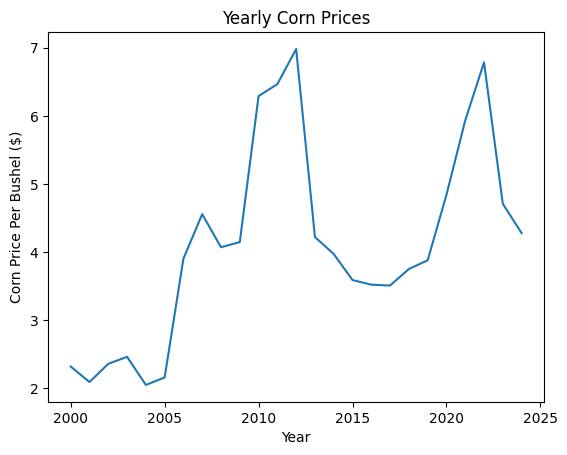

In [94]:
# Plot the yearly price data
yearly_price_data.set_index(["Year"]).plot(label="Corn Price Per Bushel ($)", legend=False)

# Add labels and title
plt.xlabel("Year")  # X-axis label
plt.ylabel("Corn Price Per Bushel ($)")  # Y-axis label

# Show the plot
plt.title("Yearly Corn Prices")  # Optional: Add a title for the plot
plt.show()

In [95]:
last_df = pd.merge(last_df, yearly_price_data, on  = "Year" , how = "left")
last_df.head()

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available,Corn_Price_Per_Bushel
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.0,1.852782,0.147187,12281.1,239393.9,12084.4,0.367039,2.3175
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.0,1.852782,0.122656,11975.3,239553.9,12084.4,0.367284,2.0900
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.0,1.852782,0.153320,11851.1,239353.9,12084.4,0.366978,2.3575
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,11735.3,237853.9,12084.4,0.364678,2.4600
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,11667.1,237853.9,12084.4,0.364678,2.0475


### Delta ºT

In [96]:
temp_data = pd.read_csv(filepath + "FAO_Temperature.csv")
temp_data = temp_data[temp_data["Months"] == "Meteorological year"]
temp_data = temp_data[temp_data['Year'] >= 2000]
temp_data = temp_data[temp_data['Year'] <= 2021]
temp_data = temp_data.dropna()
temp_data

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
1047,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2000,2000,°c,1.064,E,Estimated value
1048,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2001,2001,°c,1.377,E,Estimated value
1049,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2002,2002,°c,1.457,E,Estimated value
1050,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2003,2003,°c,0.710,E,Estimated value
1051,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2004,2004,°c,1.482,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241886,ET,Temperature change on land,716,Zimbabwe,7271,Temperature change,7020,Meteorological year,2017,2017,°c,0.243,E,Estimated value
241887,ET,Temperature change on land,716,Zimbabwe,7271,Temperature change,7020,Meteorological year,2018,2018,°c,0.636,E,Estimated value
241888,ET,Temperature change on land,716,Zimbabwe,7271,Temperature change,7020,Meteorological year,2019,2019,°c,1.199,E,Estimated value
241889,ET,Temperature change on land,716,Zimbabwe,7271,Temperature change,7020,Meteorological year,2020,2020,°c,0.581,E,Estimated value


In [97]:
value_counts_per_area = temp_data.groupby("Area")["Value"].count()

area_not_equal_to_22 = value_counts_per_area[value_counts_per_area !=22].index
area_not_equal_to_22

Index(['American Samoa', 'Anguilla', 'Antigua and Barbuda', 'Aruba', 'Burundi',
       'Cabo Verde', 'Cayman Islands', 'Christmas Island', 'Costa Rica',
       'Djibouti', 'Dominica', 'Eritrea', 'Guadeloupe', 'Kiribati',
       'Midway Island', 'Montenegro', 'Montserrat',
       'Netherlands Antilles (former)', 'Norfolk Island', 'Palau', 'Pitcairn',
       'Puerto Rico', 'Rwanda', 'Réunion', 'Saint Kitts and Nevis', 'Samoa',
       'Serbia', 'Serbia and Montenegro', 'Sierra Leone', 'Singapore',
       'Solomon Islands', 'South Georgia and the South Sandwich Islands',
       'South Sudan', 'Sudan', 'Sudan (former)', 'Timor-Leste',
       'United States Virgin Islands', 'Wake Island'],
      dtype='object', name='Area')

In [98]:
temp_data = temp_data[~temp_data["Area"].isin(area_not_equal_to_22)]
temp_data = temp_data[['Area', 'Year', 'Value']]
temp_data

,Area,Year,Value
1047,Afghanistan,2000,1.064
1048,Afghanistan,2001,1.377
1049,Afghanistan,2002,1.457
1050,Afghanistan,2003,0.710
1051,Afghanistan,2004,1.482
...,...,...,...
241886,Zimbabwe,2017,0.243
241887,Zimbabwe,2018,0.636
241888,Zimbabwe,2019,1.199
241889,Zimbabwe,2020,0.581


In [99]:
temp_data['iso3'] = temp_data['Area'].apply(get_iso3)
temp_data[temp_data['iso3'].isnull()]["Area"].unique()

array(['Bolivia (Plurinational State of)', 'Channel Islands',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Democratic Republic of the Congo',
       'Holy See', 'Iran (Islamic Republic of)',
       'Micronesia (Federated States of)', 'Netherlands (Kingdom of the)',
       'Palestine', 'Republic of Korea', 'Svalbard and Jan Mayen Islands',
       'Venezuela (Bolivarian Republic of)', 'Wallis and Futuna Islands'],
      dtype=object)

In [100]:
country_mapping_temp = {
    'Bolivia (Plurinational State of)':'Bolivia, Plurinational State of',
    'China, Taiwan Province of':'Taiwan, Province of China',
    'China': 'China_',
    'China, mainland':'China',
    'Democratic Republic of the Congo':'Congo, The Democratic Republic of the',
    'Iran (Islamic Republic of)':'Iran, Islamic Republic of',
    'Micronesia (Federated States of)': 'Micronesia, Federated States of',
    'Netherlands (Kingdom of the)':'Netherlands',
    'Republic of Korea': 'Korea, Republic of',
    'Venezuela (Bolivarian Republic of)':'Venezuela, Bolivarian Republic of',
    'China, Hong Kong SAR': 'Hong Kong',
    'Holy See':'Holy See (Vatican City State)',
    'Palestine': 'Palestine, State of',
    'Svalbard and Jan Mayen Islands':'Svalbard and Jan Mayen',
    'Wallis and Futuna Islands':'Wallis and Futuna',
    # You can add more mappings if necessary
}

temp_data['Area'] = temp_data['Area'].replace(country_mapping_temp)
temp_data['iso3'] = temp_data['Area'].apply(get_iso3)
temp_data[temp_data['iso3'].isnull()]["Area"].unique()

array(['Channel Islands', 'China_', 'China, Macao SAR'], dtype=object)

In [101]:
temp_data = temp_data.dropna()
temp_data = temp_data.reset_index()
temp_data.drop('index', axis=1, inplace=True)
temp_data.rename(columns={'Area':'Country', 'Value':'Temperature Change'}, inplace=True)
temp_data

,Country,Year,Temperature Change,iso3
0,Afghanistan,2000,1.064,AFG
1,Afghanistan,2001,1.377,AFG
2,Afghanistan,2002,1.457,AFG
3,Afghanistan,2003,0.710,AFG
4,Afghanistan,2004,1.482,AFG
...,...,...,...,...
4241,Zimbabwe,2017,0.243,ZWE
4242,Zimbabwe,2018,0.636,ZWE
4243,Zimbabwe,2019,1.199,ZWE
4244,Zimbabwe,2020,0.581,ZWE


In [102]:
last_df = pd.merge(last_df,temp_data, on=['iso3','Year'], how='outer')
last_df = last_df.drop(["Country_y"], axis=1)
last_df

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available,Corn_Price_Per_Bushel,Temperature Change
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.0,1.852782,0.147187,12281.1,239393.9,12084.4,0.367039,2.3175,1.064
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.0,1.852782,0.122656,11975.3,239553.9,12084.4,0.367284,2.0900,1.377
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.0,1.852782,0.153320,11851.1,239353.9,12084.4,0.366978,2.3575,1.457
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,11735.3,237853.9,12084.4,0.364678,2.4600,0.710
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,11667.1,237853.9,12084.4,0.364678,2.0475,1.482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,NaN,2017.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.243
4286,NaN,2018.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.636
4287,NaN,2019.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.199
4288,NaN,2020.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.581


In [103]:
last_df = last_df.rename(columns={'Country_x':'Country'})

In [104]:
last_df = last_df.dropna()
last_df = last_df.reset_index()
last_df.drop('index', axis=1, inplace=True)
last_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available,Corn_Price_Per_Bushel,Temperature Change
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12281.1,239393.90,12084.400,0.367039,2.3175,1.064
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,1.852782,0.122656,11975.3,239553.90,12084.400,0.367284,2.0900,1.377
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,11851.1,239353.90,12084.400,0.366978,2.3575,1.457
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11735.3,237853.90,12084.400,0.364678,2.4600,0.710
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11667.1,237853.90,12084.400,0.364678,2.0475,1.482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,61.042885,1.928926,473443.9,17364.16,453786.700,0.023358,3.5075,0.579
1712,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,60.789707,1.460883,473059.8,20843.54,451904.600,0.028038,3.7500,0.998
1713,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,60.536515,1.132236,471995.7,23286.67,450022.400,0.031325,3.8775,1.349
1714,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,471548.3,18368.41,448140.300,0.024709,4.8400,1.386


### Poverty levels

In [105]:
#poverty_data = pd.read_csv("./Data/World_Bank_Group_Poverty.csv")
#poverty_data

### GDP

In [106]:
gdp_data = pd.read_csv(filepath + "FAOSTAT_GDP.csv")
gdp_data = gdp_data[gdp_data['Year'] >= 2000]
gdp_data = gdp_data[gdp_data['Year'] <= 2021]
gdp_data.drop('Note', axis=1, inplace=True)
gdp_data = gdp_data.dropna()
gdp_data

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
30,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2000,2000,million USD,3531.869351,X,Figure from international organizations
31,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2001,2001,million USD,3620.525250,X,Figure from international organizations
32,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2002,2002,million USD,4285.191376,X,Figure from international organizations
33,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2003,2003,million USD,4898.791114,X,Figure from international organizations
34,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2004,2004,million USD,5504.073142,X,Figure from international organizations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10865,MK,Macro Indicators,716,Zimbabwe,6110,Value US$,22008,Gross Domestic Product,2017,2017,million USD,22040.654699,X,Figure from international organizations
10866,MK,Macro Indicators,716,Zimbabwe,6110,Value US$,22008,Gross Domestic Product,2018,2018,million USD,23645.265549,X,Figure from international organizations
10867,MK,Macro Indicators,716,Zimbabwe,6110,Value US$,22008,Gross Domestic Product,2019,2019,million USD,22594.520375,X,Figure from international organizations
10868,MK,Macro Indicators,716,Zimbabwe,6110,Value US$,22008,Gross Domestic Product,2020,2020,million USD,21664.745864,X,Figure from international organizations


In [107]:
value_counts_per_area = gdp_data.groupby("Area")["Value"].count()

area_not_equal_to_22 = value_counts_per_area[value_counts_per_area !=22].index
area_not_equal_to_22

Index(['Curaçao', 'Netherlands Antilles (former)', 'Sint Maarten (Dutch part)',
       'South Sudan', 'Sudan', 'Sudan (former)'],
      dtype='object', name='Area')

In [108]:
gdp_data = gdp_data[~gdp_data["Area"].isin(area_not_equal_to_22)]
gdp_data = gdp_data[['Area', 'Year', 'Value']]
gdp_data

,Area,Year,Value
30,Afghanistan,2000,3531.869351
31,Afghanistan,2001,3620.525250
32,Afghanistan,2002,4285.191376
33,Afghanistan,2003,4898.791114
34,Afghanistan,2004,5504.073142
...,...,...,...
10865,Zimbabwe,2017,22040.654699
10866,Zimbabwe,2018,23645.265549
10867,Zimbabwe,2019,22594.520375
10868,Zimbabwe,2020,21664.745864


In [109]:
gdp_data['iso3'] = gdp_data['Area'].apply(get_iso3)
gdp_data[gdp_data['iso3'].isnull()]["Area"].unique()

array(['Bolivia (Plurinational State of)', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland',
       'Democratic Republic of the Congo', 'Iran (Islamic Republic of)',
       'Micronesia (Federated States of)', 'Netherlands (Kingdom of the)',
       'Palestine', 'Republic of Korea',
       'Venezuela (Bolivarian Republic of)'], dtype=object)

In [110]:
country_mapping_temp = {
    'Bolivia (Plurinational State of)':'Bolivia, Plurinational State of',
    'China, Taiwan Province of':'Taiwan, Province of China',
    'China': 'China_',
    'China, mainland':'China',
    'Democratic Republic of the Congo':'Congo, The Democratic Republic of the',
    'Iran (Islamic Republic of)':'Iran, Islamic Republic of',
    'Micronesia (Federated States of)': 'Micronesia, Federated States of',
    'Netherlands (Kingdom of the)':'Netherlands',
    'Republic of Korea': 'Korea, Republic of',
    'Venezuela (Bolivarian Republic of)':'Venezuela, Bolivarian Republic of',
    'China, Hong Kong SAR': 'Hong Kong',
    'Palestine': 'Palestine, State of',
    # You can add more mappings if necessary
}

gdp_data['Area'] = gdp_data['Area'].replace(country_mapping_temp)
gdp_data['iso3'] = gdp_data['Area'].apply(get_iso3)
gdp_data[gdp_data['iso3'].isnull()]["Area"].unique()

array(['China_', 'China, Macao SAR'], dtype=object)

In [111]:
gdp_data = gdp_data.dropna()
gdp_data = gdp_data.reset_index()
gdp_data.drop('index', axis=1, inplace=True)
gdp_data.rename(columns={'Area':'Country', 'Value':'GDP'}, inplace=True)
gdp_data

,Country,Year,GDP,iso3
0,Afghanistan,2000,3531.869351,AFG
1,Afghanistan,2001,3620.525250,AFG
2,Afghanistan,2002,4285.191376,AFG
3,Afghanistan,2003,4898.791114,AFG
4,Afghanistan,2004,5504.073142,AFG
...,...,...,...,...
4505,Zimbabwe,2017,22040.654699,ZWE
4506,Zimbabwe,2018,23645.265549,ZWE
4507,Zimbabwe,2019,22594.520375,ZWE
4508,Zimbabwe,2020,21664.745864,ZWE


In [112]:
last_df = pd.merge(last_df,gdp_data, on=['iso3','Year'], how='outer')
last_df = last_df.drop(["Country_y"], axis=1)
last_df

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available,Corn_Price_Per_Bushel,Temperature Change,GDP
0,NaN,2000.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1873.452514
1,NaN,2001.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896.456983
2,NaN,2002.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.843575
3,NaN,2003.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2044.111732
4,NaN,2004.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2254.830726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,NaN,2017.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22040.654699
4506,NaN,2018.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23645.265549
4507,NaN,2019.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22594.520375
4508,NaN,2020.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21664.745864


In [113]:
last_df = last_df.rename(columns={'Country_x':'Country'})
last_df = last_df.dropna()
last_df = last_df.reset_index()
last_df.drop('index', axis=1, inplace=True)
last_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available,Corn_Price_Per_Bushel,Temperature Change,GDP
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12281.1,239393.90,12084.400,0.367039,2.3175,1.064,3531.869351
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,1.852782,0.122656,11975.3,239553.90,12084.400,0.367284,2.0900,1.377,3620.525250
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,11851.1,239353.90,12084.400,0.366978,2.3575,1.457,4285.191376
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11735.3,237853.90,12084.400,0.364678,2.4600,0.710,4898.791114
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11667.1,237853.90,12084.400,0.364678,2.0475,1.482,5504.073142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,61.042885,1.928926,473443.9,17364.16,453786.700,0.023358,3.5075,0.579,25895.263867
1712,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,60.789707,1.460883,473059.8,20843.54,451904.600,0.028038,3.7500,0.998,26311.984274
1713,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,60.536515,1.132236,471995.7,23286.67,450022.400,0.031325,3.8775,1.349,23310.346721
1714,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,471548.3,18368.41,448140.300,0.024709,4.8400,1.386,18063.780790


In [114]:
last_df["Country"].nunique()

78

### Rainfall dataset

Source: https://data.worldbank.org/indicator/AG.LND.PRCP.MM?utm_source=chatgpt.com

**Content of data**:

 - Average precipitation in depth (mm per year)
 - Average precipitation is the long-term average in depth (over space and time) of annual precipitation in the country. Precipitation is defined as any kind of water that falls from clouds as a liquid or a solid.



In [115]:
#rainfall_df = pd.read_excel("./Data/rainfall_data.xls")
#rainfall_df.head()

## EDA

In [116]:
df_avg_forest = pd.DataFrame(last_df.groupby("Country")["Forest area (sq km)"].mean()).reset_index()
df_avg_forest['iso3'] = df_avg_forest['Country'].apply(get_iso3)
df_avg_forest

,Country,Forest area (sq km),iso3
0,Afghanistan,1.208440e+04,AFG
1,Albania,7.817236e+03,ALB
2,Algeria,1.846038e+04,DZA
3,Angola,7.188047e+05,AGO
4,Argentina,3.044967e+05,ARG
...,...,...,...
73,United States,3.079183e+06,USA
74,Uruguay,1.739602e+04,URY
75,Uzbekistan,3.361983e+04,UZB
76,Viet Nam,1.339192e+05,VNM


In [117]:
# Now plot the map with Plotly Express
fig = px.choropleth(df_avg_forest,
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='Forest area (sq km)',
                    hover_name='Country',
                    title = 'Forest Area (sq km) per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [118]:
df_avg_corn = pd.DataFrame(last_df.groupby("Country")["Total Size Cornfield in sq km"].mean()).reset_index()
df_avg_corn['iso3'] = df_avg_corn['Country'].apply(get_iso3)
df_avg_corn

,Country,Total Size Cornfield in sq km,iso3
0,Afghanistan,1474.690455,AFG
1,Albania,528.710909,ALB
2,Algeria,7.200000,DZA
3,Angola,15592.615000,AGO
4,Argentina,42555.029091,ARG
...,...,...,...
73,United States,321765.154545,USA
74,Uruguay,814.931818,URY
75,Uzbekistan,378.259545,UZB
76,Viet Nam,10417.120455,VNM


In [119]:
# Now plot the map with Plotly Express
fig = px.choropleth(last_df,
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='Total Size Cornfield in sq km',  # deforestation rates
                    hover_name='Country',
                    title = 'Corn Fields in sq km per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

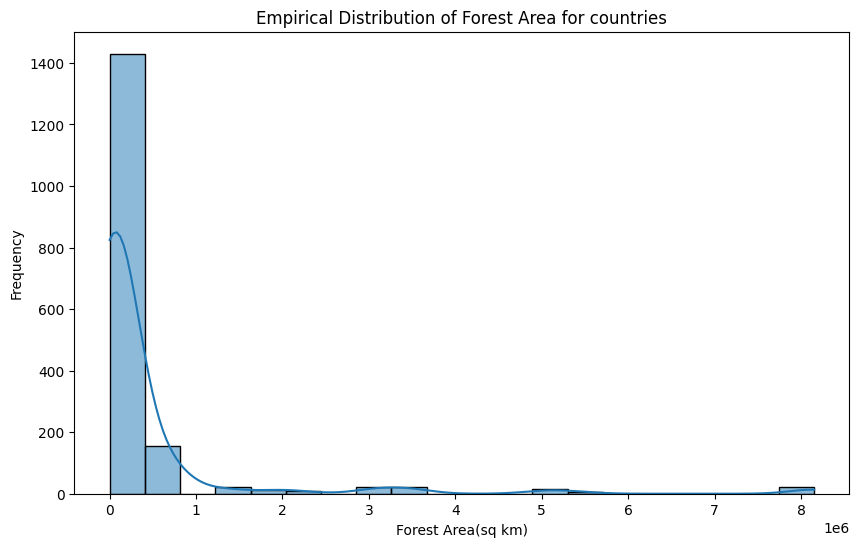

In [120]:
plt.figure(figsize=(10,6))
sns.histplot(last_df['Forest area (sq km)'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Forest Area(sq km)')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Forest Area for countries')

# Show the plot
plt.show()

In [121]:
last_df['Forest area (sq km)'].skew()

np.float64(4.702838928072025)

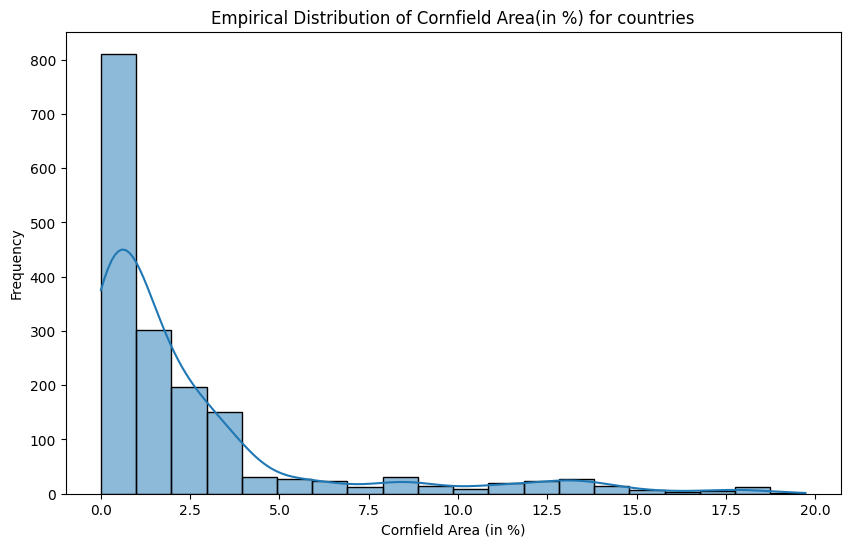

In [122]:
#A modifier
plt.figure(figsize=(10,6))
sns.histplot(last_df['% of Cornfield Area'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Cornfield Area (in %)')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Cornfield Area(in %) for countries')

# Show the plot
plt.show()

In [123]:
#A modifier
last_df['% of Cornfield Area'].skew()

np.float64(2.3710169310880844)

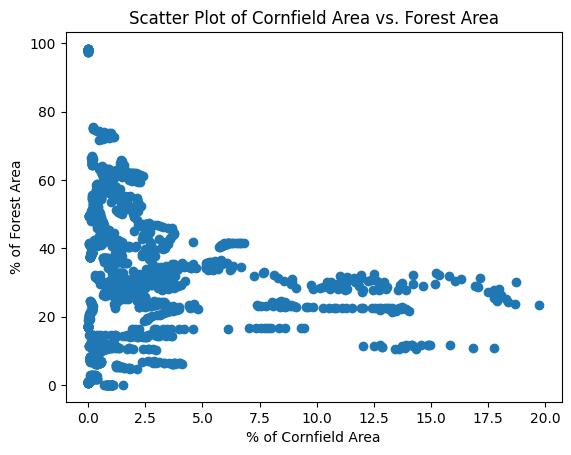

In [124]:
#A modifier
# Create a scatter plot
plt.scatter(last_df['% of Cornfield Area'], last_df['% of Forest Area'])

# Set the labels for the axes
plt.xlabel('% of Cornfield Area')
plt.ylabel('% of Forest Area')

# Set the title of the plot
plt.title('Scatter Plot of Cornfield Area vs. Forest Area')

# Calculate the linear regression
x = last_df['% of Cornfield Area']
y = last_df['% of Forest Area']

# Show the plot
plt.show()

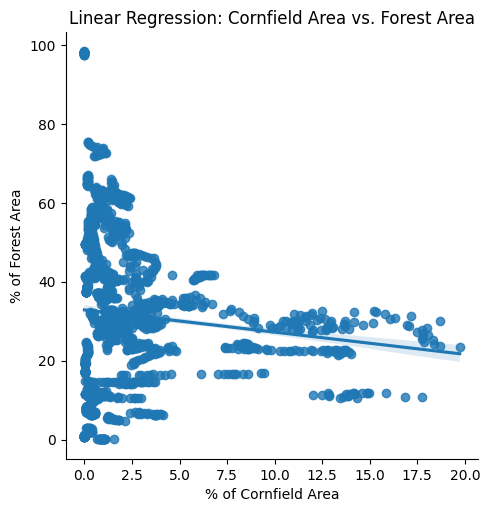

In [125]:
#A modifier aussi
# Create a scatter plot with a linear regression line
sns.lmplot(x='% of Cornfield Area', y='% of Forest Area', data=last_df)

# Set the title of the plot
plt.title('Linear Regression: Cornfield Area vs. Forest Area')

# Show the plot
plt.show()

# Inclusion of the dummy for the heterogeneity variable in sq km

In [126]:
last_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available,Corn_Price_Per_Bushel,Temperature Change,GDP
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12281.1,239393.90,12084.400,0.367039,2.3175,1.064,3531.869351
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,1.852782,0.122656,11975.3,239553.90,12084.400,0.367284,2.0900,1.377,3620.525250
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,11851.1,239353.90,12084.400,0.366978,2.3575,1.457,4285.191376
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11735.3,237853.90,12084.400,0.364678,2.4600,0.710,4898.791114
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11667.1,237853.90,12084.400,0.364678,2.0475,1.482,5504.073142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,61.042885,1.928926,473443.9,17364.16,453786.700,0.023358,3.5075,0.579,25895.263867
1712,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,60.789707,1.460883,473059.8,20843.54,451904.600,0.028038,3.7500,0.998,26311.984274
1713,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,60.536515,1.132236,471995.7,23286.67,450022.400,0.031325,3.8775,1.349,23310.346721
1714,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,471548.3,18368.41,448140.300,0.024709,4.8400,1.386,18063.780790


In [127]:
#Dummy for the heterogeneity variable
# Finding the median of Land_Size
initial_hetero_var = last_df['Total Size Land suitable for corn expansion (sq km)']
median_suitable_land = initial_hetero_var.median()
median_suitable_land
# Creating a dummy variable for whether the land size is higher than the median
last_df['Suitable_Land_Higher_Than_Median'] = last_df['Total Size Land suitable for corn expansion (sq km)'].apply(lambda val: 1 if (val>median_suitable_land) else 0)
last_df


,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available,Corn_Price_Per_Bushel,Temperature Change,GDP,Suitable_Land_Higher_Than_Median
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12281.1,239393.90,12084.400,0.367039,2.3175,1.064,3531.869351,1
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,1.852782,0.122656,11975.3,239553.90,12084.400,0.367284,2.0900,1.377,3620.525250,1
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,11851.1,239353.90,12084.400,0.366978,2.3575,1.457,4285.191376,1
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11735.3,237853.90,12084.400,0.364678,2.4600,0.710,4898.791114,1
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11667.1,237853.90,12084.400,0.364678,2.0475,1.482,5504.073142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,61.042885,1.928926,473443.9,17364.16,453786.700,0.023358,3.5075,0.579,25895.263867,1
1712,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,60.789707,1.460883,473059.8,20843.54,451904.600,0.028038,3.7500,0.998,26311.984274,1
1713,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,60.536515,1.132236,471995.7,23286.67,450022.400,0.031325,3.8775,1.349,23310.346721,1
1714,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,471548.3,18368.41,448140.300,0.024709,4.8400,1.386,18063.780790,1


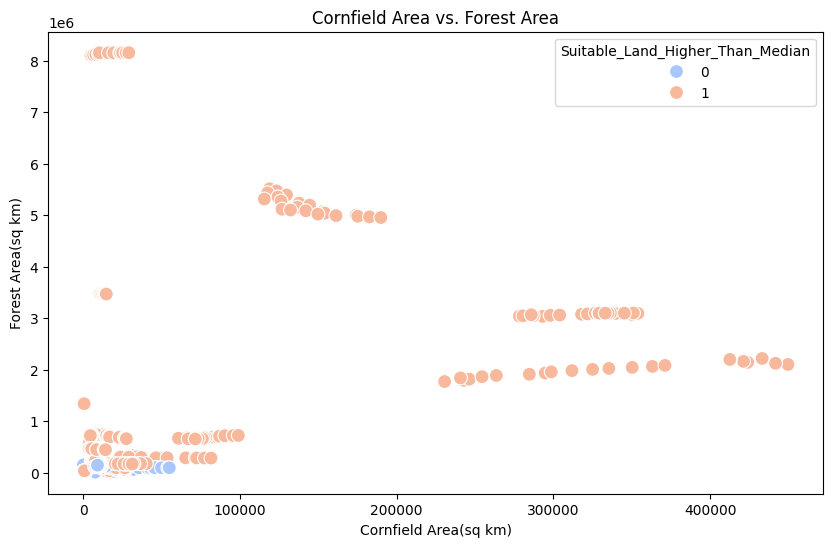

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=last_df,
                x='Total Size Cornfield in sq km',
                y='Forest area (sq km)',
                hue='Suitable_Land_Higher_Than_Median',
                palette='coolwarm',
                s=100)

# Adding labels and title
plt.title('Cornfield Area vs. Forest Area')
plt.xlabel('Cornfield Area(sq km)')
plt.ylabel('Forest Area(sq km)')

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

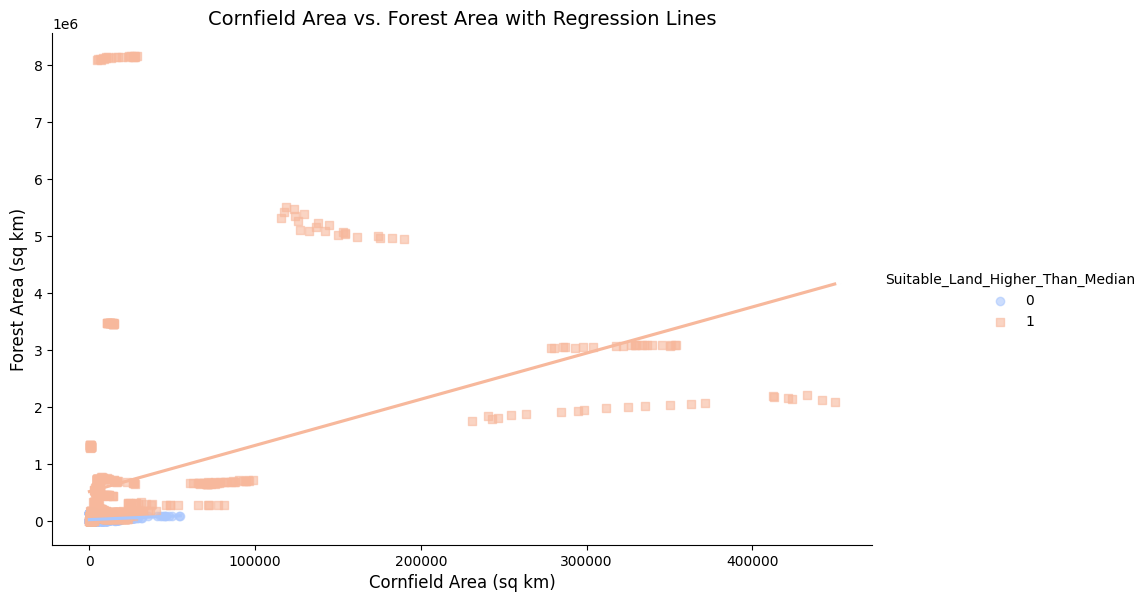

In [129]:
plt.figure(figsize=(10, 6))

# Create a scatterplot with regression lines
sns.lmplot(
    data=last_df,
    x='Total Size Cornfield in sq km',
    y='Forest area (sq km)',
    hue='Suitable_Land_Higher_Than_Median',
    palette='coolwarm',
    markers=['o', 's'],  # Different markers for each group
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Cornfield Area vs. Forest Area with Regression Lines', fontsize=14)
plt.xlabel('Cornfield Area (sq km)', fontsize=12)
plt.ylabel('Forest Area (sq km)', fontsize=12)

# Show the plot
plt.show()

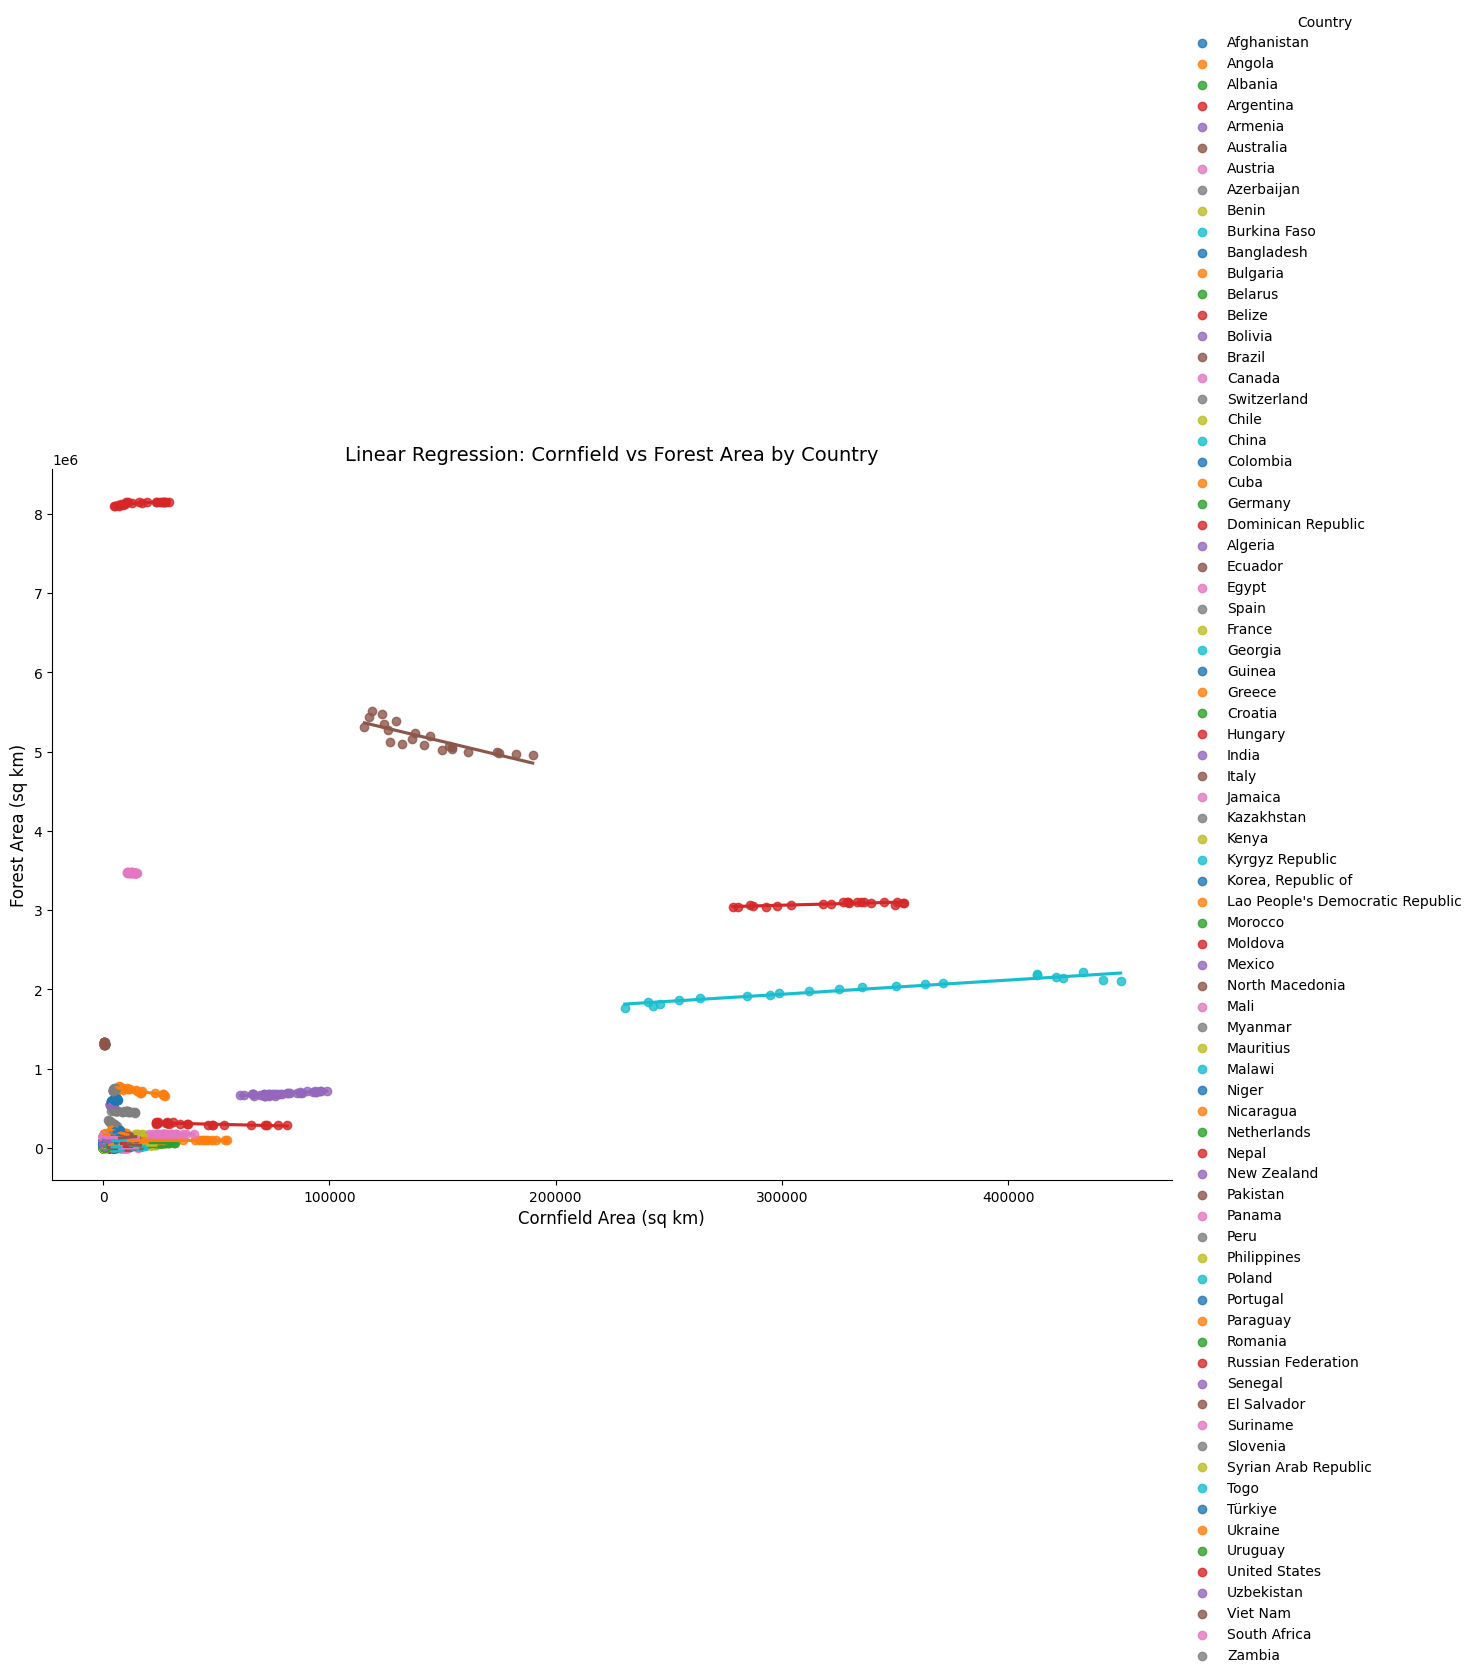

In [130]:
# Multiple linear regression lines, one for each country
sns.lmplot(
    data=last_df,
    x='Total Size Cornfield in sq km',
    y='Forest area (sq km)',
    hue='Country',  # Different colors for each country
    palette='tab10',  # Choose a palette
    ci=None,  # Remove confidence intervals for clarity
    height=8,  # Figure height
    aspect=1.5  # Aspect ratio
)

# Add labels and title
plt.title('Linear Regression: Cornfield vs Forest Area by Country', fontsize=14)
plt.xlabel('Cornfield Area (sq km)', fontsize=12)
plt.ylabel('Forest Area (sq km)', fontsize=12)

# Show the plot
plt.show()

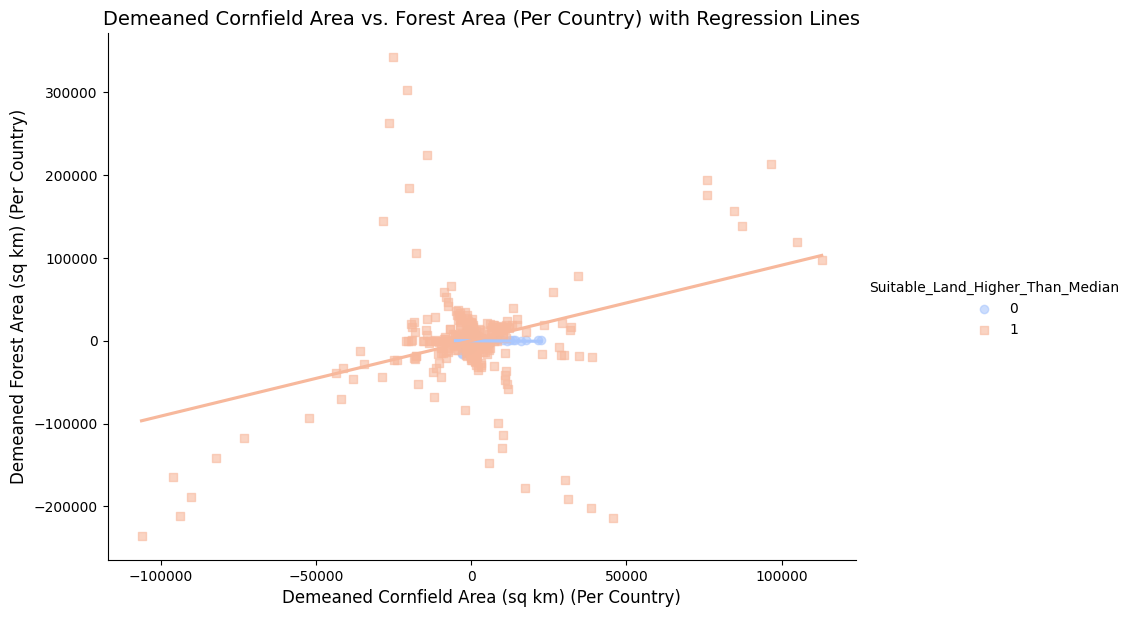

In [131]:
# Demean Cornfield Area` and  Forest Area` within each country
last_df['Demeaned_Cornfield_Area'] = last_df.groupby('Country')['Total Size Cornfield in sq km'].transform(lambda x: x - x.mean())
last_df['Demeaned_Forest_Area'] = last_df.groupby('Country')['Forest area (sq km)'].transform(lambda x: x - x.mean())

# Plot the demeaned data
sns.lmplot(
    data=last_df,
    x='Demeaned_Cornfield_Area',  # Demeaned Cornfield Area per country
    y='Demeaned_Forest_Area',  # Demeaned Forest Area per country
    hue='Suitable_Land_Higher_Than_Median',  # Group by suitability
    palette='coolwarm',
    markers=['o', 's'],  # Different markers for each group
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Demeaned Cornfield Area vs. Forest Area (Per Country) with Regression Lines', fontsize=14)
plt.xlabel('Demeaned Cornfield Area (sq km) (Per Country)', fontsize=12)
plt.ylabel('Demeaned Forest Area (sq km) (Per Country)', fontsize=12)

# Show the plot
plt.show()

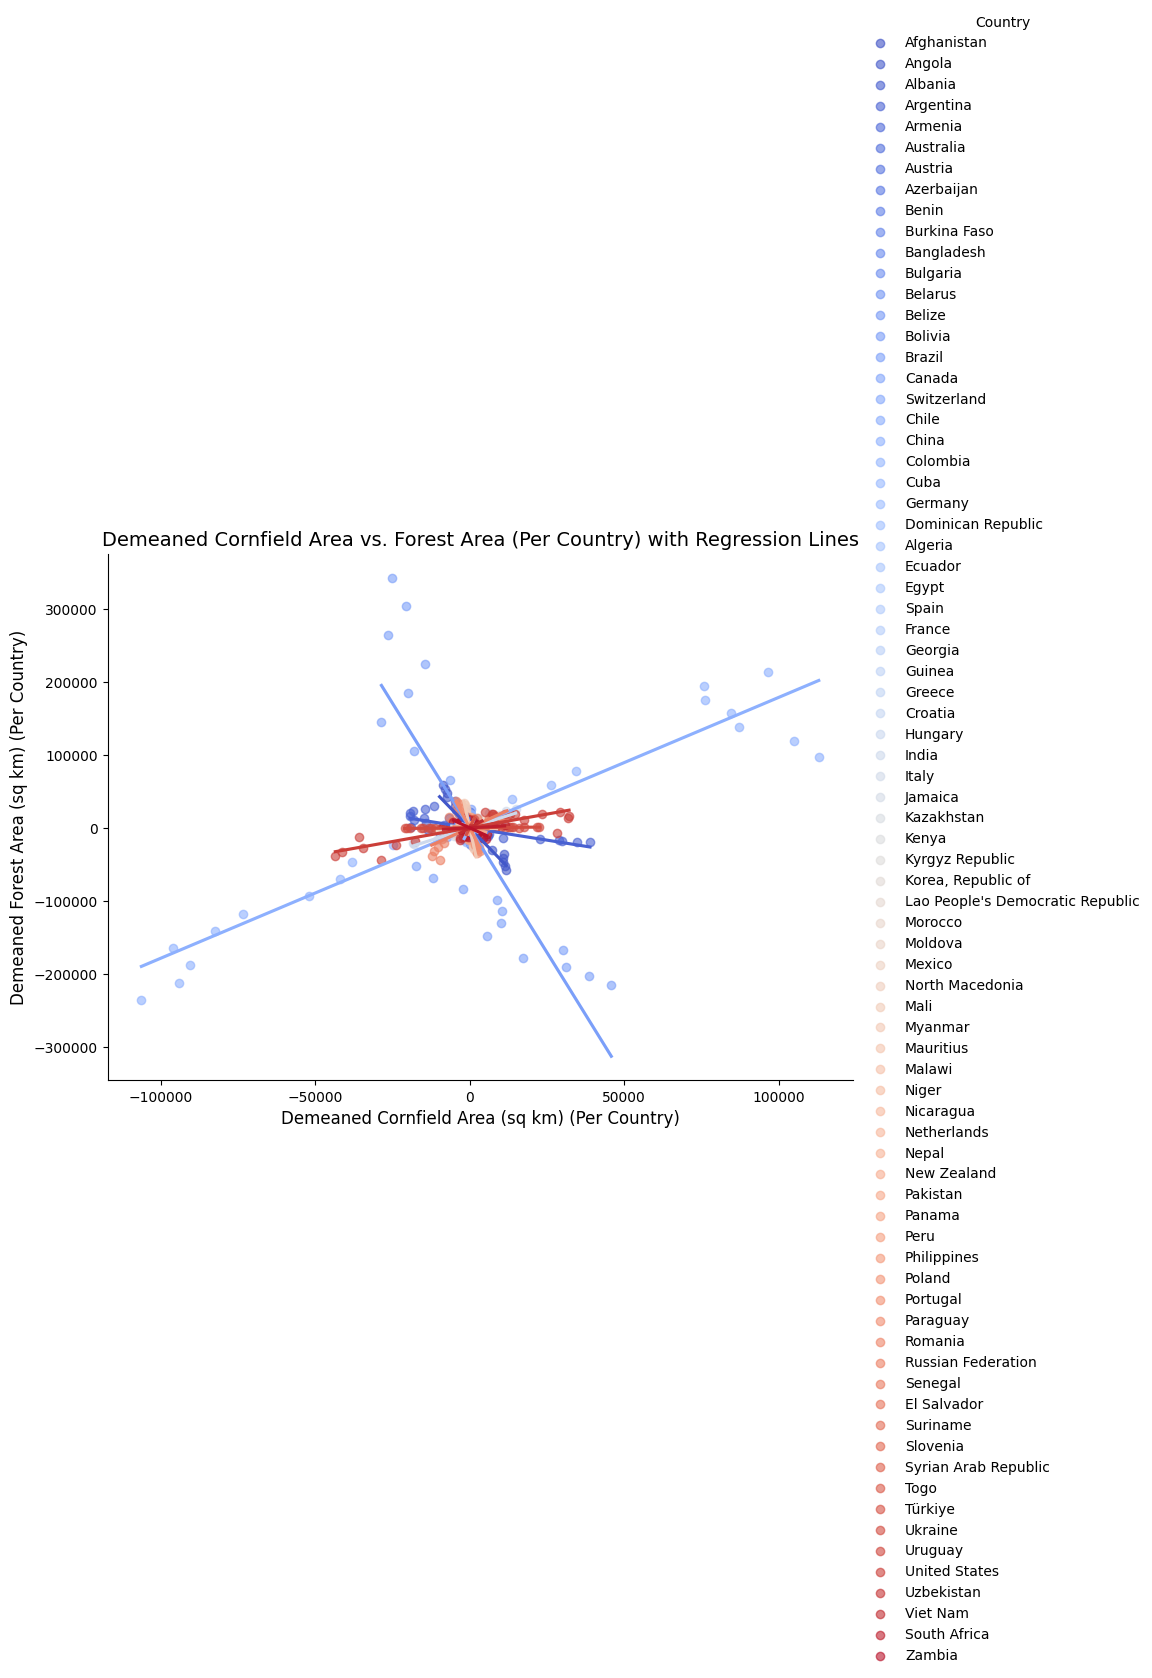

In [132]:

# Plot the demeaned data
sns.lmplot(
    data=last_df,
    x='Demeaned_Cornfield_Area',  # Demeaned Cornfield Area per country
    y='Demeaned_Forest_Area',  # Demeaned Forest Area per country
    hue='Country',  # Group by suitability
    palette='coolwarm',
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Demeaned Cornfield Area vs. Forest Area (Per Country) with Regression Lines', fontsize=14)
plt.xlabel('Demeaned Cornfield Area (sq km) (Per Country)', fontsize=12)
plt.ylabel('Demeaned Forest Area (sq km) (Per Country)', fontsize=12)

# Show the plot
plt.show()

In [133]:
# correlation between cornfield area and forest area for group 0,
#so for countries with suitable land available for corn expansion lower than the median:
group0 = last_df[last_df['Suitable_Land_Higher_Than_Median']==0]
correlation0 = group0['Total Size Cornfield in sq km'].corr(group0['Forest area (sq km)'])

# correlation between cornfield area and forest area for group 1,
#so for countries with suitable land available for corn expansion higher than the median:
group1 = last_df[last_df['Suitable_Land_Higher_Than_Median']==1]
correlation1 = group1['Total Size Cornfield in sq km'].corr(group1['Forest area (sq km)'])

print(f"Correlation for Group 0: {correlation0}")
print(f"Correlation for Group 1: {correlation1}")

Correlation for Group 0: 0.24113082467409275
Correlation for Group 1: 0.38232842482039425


In [134]:
# correlation between cornfield area and forest area for group 0,
#so for countries with suitable land available for corn expansion lower than the median:
group0 = last_df[last_df['Suitable_Land_Higher_Than_Median']==0]
correlation0 = group0['Demeaned_Cornfield_Area'].corr(group0['Demeaned_Forest_Area'])

# correlation between cornfield area and forest area for group 1,
#so for countries with suitable land available for corn expansion higher than the median:
group1 = last_df[last_df['Suitable_Land_Higher_Than_Median']==1]
correlation1 = group1['Demeaned_Cornfield_Area'].corr(group1['Demeaned_Forest_Area'])

print(f"Correlation for Group 0: {correlation0}")
print(f"Correlation for Group 1: {correlation1}")

Correlation for Group 0: -0.023278964291727773
Correlation for Group 1: 0.3365219421156283


# Inclusion of the dummy for the heterogeneity variable, all in %

In [135]:
#Dummy for the heterogeneity variable
# Finding the median of Land_Size
initial_hetero_var_pct = last_df['% Land available'][last_df['Year']==last_df['Year'].min()]
median_suitable_land_pct = initial_hetero_var_pct.median()
median_suitable_land_pct
# Creating a dummy variable for whether the land size is higher than the median
last_df['Suitable_Land_Higher_Than_Median_pct'] = last_df['% Land available'].apply(lambda val: 1 if (val>median_suitable_land_pct) else 0)
last_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available,Corn_Price_Per_Bushel,Temperature Change,GDP,Suitable_Land_Higher_Than_Median,Demeaned_Cornfield_Area,Demeaned_Forest_Area,Suitable_Land_Higher_Than_Median_pct
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12281.1,239393.90,12084.400,0.367039,2.3175,1.064,3531.869351,1,-514.690455,1.818989e-12,1
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,1.852782,0.122656,11975.3,239553.90,12084.400,0.367284,2.0900,1.377,3620.525250,1,-674.690455,1.818989e-12,1
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,11851.1,239353.90,12084.400,0.366978,2.3575,1.457,4285.191376,1,-474.690455,1.818989e-12,1
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11735.3,237853.90,12084.400,0.364678,2.4600,0.710,4898.791114,1,1025.309545,1.818989e-12,1
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11667.1,237853.90,12084.400,0.364678,2.0475,1.482,5504.073142,1,1025.309545,1.818989e-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,61.042885,1.928926,473443.9,17364.16,453786.700,0.023358,3.5075,0.579,25895.263867,1,5456.480000,-8.422533e+03,0
1712,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,60.789707,1.460883,473059.8,20843.54,451904.600,0.028038,3.7500,0.998,26311.984274,1,1977.100000,-1.030463e+04,0
1713,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,60.536515,1.132236,471995.7,23286.67,450022.400,0.031325,3.8775,1.349,23310.346721,1,-466.030000,-1.218683e+04,0
1714,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,471548.3,18368.41,448140.300,0.024709,4.8400,1.386,18063.780790,1,4452.230000,-1.406893e+04,0


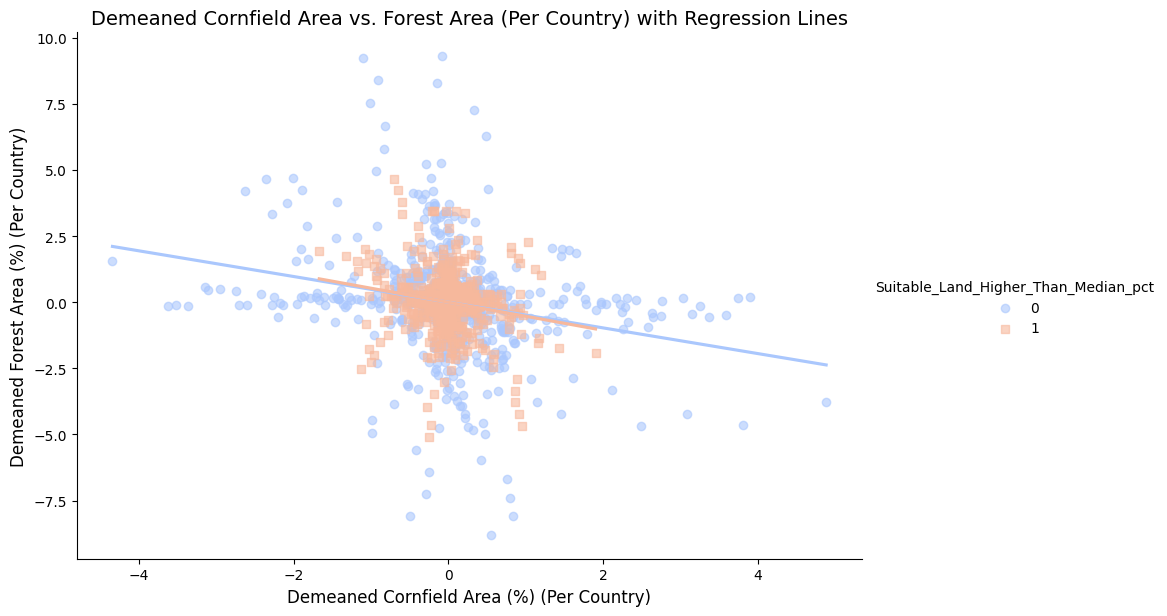

In [136]:
# Demean Cornfield Area` and  Forest Area` within each country
last_df['Demeaned_Cornfield_Area_pct'] = last_df.groupby('Country')['% of Cornfield Area'].transform(lambda x: x - x.mean())
last_df['Demeaned_Forest_Area_pct'] = last_df.groupby('Country')['% of Forest Area'].transform(lambda x: x - x.mean())

# Plot the demeaned data
sns.lmplot(
    data=last_df,
    x='Demeaned_Cornfield_Area_pct',  # Demeaned Cornfield Area per country
    y='Demeaned_Forest_Area_pct',  # Demeaned Forest Area per country
    hue='Suitable_Land_Higher_Than_Median_pct',  # Group by suitability
    palette='coolwarm',
    markers=['o', 's'],  # Different markers for each group
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Demeaned Cornfield Area vs. Forest Area (Per Country) with Regression Lines', fontsize=14)
plt.xlabel('Demeaned Cornfield Area (%) (Per Country)', fontsize=12)
plt.ylabel('Demeaned Forest Area (%) (Per Country)', fontsize=12)

# Show the plot
plt.show()

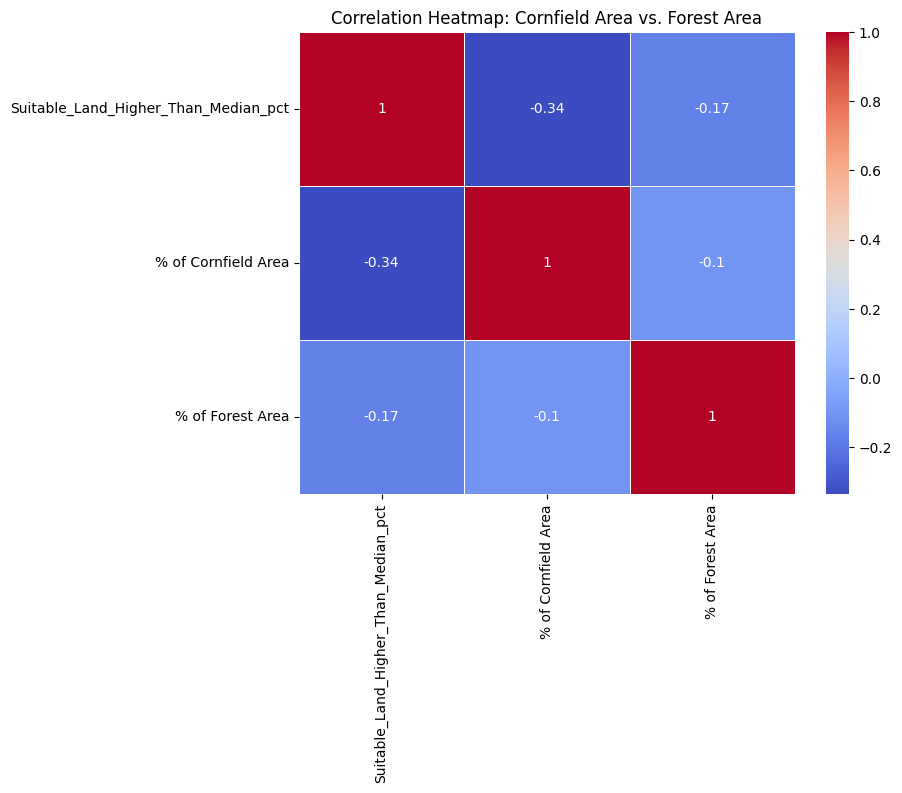

In [137]:
df_features = last_df[['Suitable_Land_Higher_Than_Median_pct','% of Cornfield Area', '% of Forest Area']]

# Calculating the correlation matrix
correlation_matrix = df_features.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap: Cornfield Area vs. Forest Area')
plt.show()

In [138]:
import plotly.express as px
fig_box = px.box(last_df,                                           # Specify data frame
                 y=['% of Cornfield Area'],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = 'Suitable_Land_Higher_Than_Median_pct',                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Cornfield Area for land size bigger than median
                 <br>(Higher than median: 1.0; Lower than median: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box

In [139]:
fig_box = px.box(last_df,                                           # Specify data frame
                 y=['% of Forest Area'],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = 'Suitable_Land_Higher_Than_Median',                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Forest Area for land size bigger than median
                 <br>(Higher than median: 1.0; Lower than median: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box

In [140]:
print(np.percentile(last_df['% of Cornfield Area'], 25), last_df['% of Cornfield Area'].median(), np.percentile(last_df['% of Cornfield Area'], 75))

0.36373703081897424 1.1187608114663607 2.8260206109018364


In [141]:
print(np.percentile(last_df['% of Forest Area'], 25), last_df['% of Forest Area'].median(), np.percentile(last_df['% of Forest Area'], 75))

14.576639923457027 30.367161017787055 43.16495888570354


In [142]:
#reg for non normalized rates
import statsmodels.api as sm
X = sm.add_constant(last_df[['% of Cornfield Area']])

# Dependent variable (Y)
Y = last_df['% of Forest Area']

# Fit the OLS regression model
ols_model = sm.OLS(Y, X).fit(cov_type='HC3')

# Display the OLS regression results
ols_results_extended = ols_model.summary()
ols_results_extended

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       % of Forest Area   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     46.87
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.05e-11
Time:                        17:52:20   Log-Likelihood:                -7531.1
No. Observations:                1716   AIC:                         1.507e+04
Df Residuals:                    1714   BIC:                         1.508e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.8338      0.631     52.015      0.000      31.597      34.071
% of Cornfield Area    -0.5627      0.082     -6.846      0.000      -0.724      -0.402
==============================================================================
Omnibus:                       54.197   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.868
Skew:                           0.432   Prob(JB):                     1.65e-13
Kurtosis:                       3.277   Cond. No.                         5.42
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

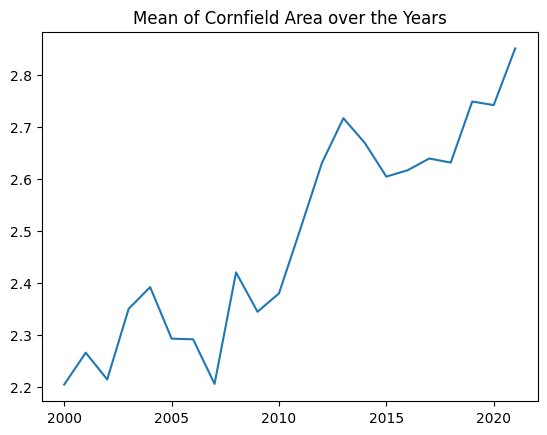

In [143]:
df_avg_globalyear = pd.DataFrame(last_df.groupby("Year")['% of Cornfield Area'].mean()).reset_index()
#df_avg_globalyear['iso3'] = df_avg_globalyear['country'].apply(get_iso3)
plt.figure()
plt.plot(df_avg_globalyear['Year'], df_avg_globalyear['% of Cornfield Area'])
plt.title('Mean of Cornfield Area over the Years')
plt.show()

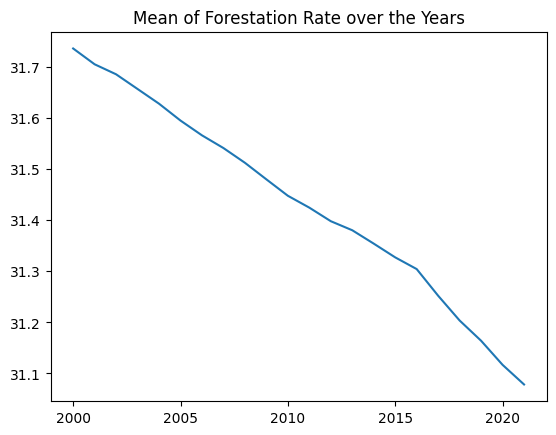

In [144]:
df_avg_globalyear = pd.DataFrame(last_df.groupby("Year")['% of Forest Area'].mean()).reset_index()
#df_avg_globalyear['iso3'] = df_avg_globalyear['country'].apply(get_iso3)
plt.figure()
plt.plot(df_avg_globalyear['Year'], df_avg_globalyear['% of Forest Area'])
plt.title('Mean of Forestation Rate over the Years')
plt.show()

## Linear Regressions

In [145]:
last_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),...,% Land available,Corn_Price_Per_Bushel,Temperature Change,GDP,Suitable_Land_Higher_Than_Median,Demeaned_Cornfield_Area,Demeaned_Forest_Area,Suitable_Land_Higher_Than_Median_pct,Demeaned_Cornfield_Area_pct,Demeaned_Forest_Area_pct
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12281.1,239393.90,...,0.367039,2.3175,1.064,3531.869351,1,-514.690455,1.818989e-12,1,-0.078912,-2.220446e-16
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,1.852782,0.122656,11975.3,239553.90,...,0.367284,2.0900,1.377,3620.525250,1,-674.690455,1.818989e-12,1,-0.103444,-2.220446e-16
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,11851.1,239353.90,...,0.366978,2.3575,1.457,4285.191376,1,-474.690455,1.818989e-12,1,-0.072780,-2.220446e-16
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11735.3,237853.90,...,0.364678,2.4600,0.710,4898.791114,1,1025.309545,1.818989e-12,1,0.157201,-2.220446e-16
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11667.1,237853.90,...,0.364678,2.0475,1.482,5504.073142,1,1025.309545,1.818989e-12,1,0.157201,-2.220446e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,61.042885,1.928926,473443.9,17364.16,...,0.023358,3.5075,0.579,25895.263867,1,5456.480000,-8.422533e+03,0,0.734000,-1.132990e+00
1712,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,60.789707,1.460883,473059.8,20843.54,...,0.028038,3.7500,0.998,26311.984274,1,1977.100000,-1.030463e+04,0,0.265957,-1.386168e+00
1713,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,60.536515,1.132236,471995.7,23286.67,...,0.031325,3.8775,1.349,23310.346721,1,-466.030000,-1.218683e+04,0,-0.062690,-1.639359e+00
1714,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,471548.3,18368.41,...,0.024709,4.8400,1.386,18063.780790,1,4452.230000,-1.406893e+04,0,0.598909,-1.892537e+00


In [146]:
ind_x = last_df[["Total Size Cornfield in sq km"]]

dep_y = last_df["Tree-covered areas in sq km"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Tree-covered areas in sq km   R-squared:                       0.127
Model:                                     OLS   Adj. R-squared:                  0.126
Method:                          Least Squares   F-statistic:                     248.7
Date:                         Thu, 05 Dec 2024   Prob (F-statistic):           2.01e-52
Time:                                 17:52:20   Log-Likelihood:                -26478.
No. Observations:                         1716   AIC:                         5.296e+04
Df Residuals:                             1714   BIC:                         5.297e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          2.672e+05   3.09e+04      8.651      0.000    2.07e+05    3.28e+05
Total Size Cornfield in sq km     8.3565      0.530     15.770      0.000       7.317       9.396
==============================================================================
Omnibus:                     1955.476   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120286.886
Skew:                           5.988   Prob(JB):                         0.00
Kurtosis:                      42.229   Cond. No.                     6.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multiple Linear Regressions

<Axes: xlabel='Suitable_Land_Higher_Than_Median'>

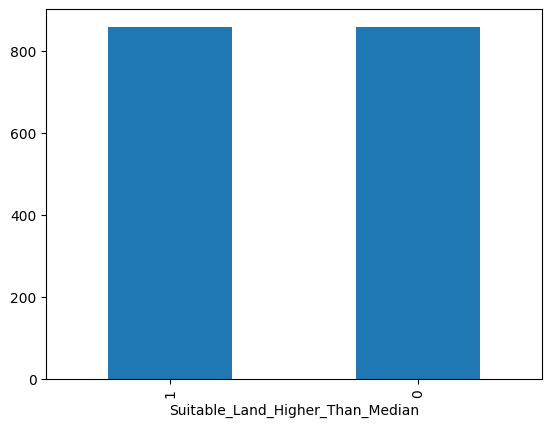

In [147]:
last_df["Suitable_Land_Higher_Than_Median"].value_counts().plot(kind = "bar")

The regression equation from the results is:

$$
\hat{Y}_{it} = \beta_{0} + \beta_1 X_{1it} + \beta_2 H_{it} + \beta_2 X_{2it} + \beta_3 X_{3it} + \beta_4 X_{4it} +\beta_5 (X_{1it}*H_{it}) + \epsilon_{it}
$$

Where:
- $\hat{Y}$: Predicted Forest Area in sq km
- $X_1$: Cornfield in sq km
- $H_{it}$: Suitable land for corn field extension. Heterogeneity variable, higher than median
- $X_2$: Average Temperature
- $X_3$: Corn price per bushel
- $X_4$: GDP
- $X_1 * H_{it}$: **Interaction variable** between **Cornfield in sq km** and **Suitable Land Higher Than Median**
- $\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5$: Coefficients from the regression model.


In [148]:
#Multivariable regression /w Temperature_Change
ind_x = last_df[["Total Size Cornfield in sq km","Total Size Land suitable for corn expansion (sq km)","Temperature Change","Corn_Price_Per_Bushel", "GDP", "landArea"]]
ind_x["Interaction variable"] = last_df["Suitable_Land_Higher_Than_Median"]*ind_x["Total Size Cornfield in sq km"]

dep_y = last_df["Tree-covered areas in sq km"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/2394022223.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Tree-covered areas in sq km   R-squared:                       0.900
Model:                                     OLS   Adj. R-squared:                  0.899
Method:                          Least Squares   F-statistic:                     2192.
Date:                         Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                                 17:52:20   Log-Likelihood:                -24620.
No. Observations:                         1716   AIC:                         4.926e+04
Df Residuals:                             1708   BIC:                         4.930e+04
Df Model:                                    7                                         
Covariance Type:                     nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                               -1.825e+05   3.44e+04     -5.311      0.000    -2.5e+05   -1.15e+05
Total Size Cornfield in sq km                          -0.4841      1.675     -0.289      0.773      -3.770       2.801
Total Size Land suitable for corn expansion (sq km)    -1.3735      0.054    -25.285      0.000      -1.480      -1.267
Temperature Change                                   7.765e+04   1.88e+04      4.131      0.000    4.08e+04    1.15e+05
Corn_Price_Per_Bushel                               -4967.5286   7088.019     -0.701      0.484   -1.89e+04    8934.584
GDP                                                     0.0187      0.009      2.120      0.034       0.001       0.036
landArea                                                0.6495      0.008     86.277      0.000       0.635       0.664
Interaction variable                                   -2.2725      1.720     -1.321      0.187      -5.645       1.101
==============================================================================
Omnibus:                     1131.336   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16417.415
Skew:                          -2.908   Prob(JB):                         0.00
Kurtosis:                      16.992   Cond. No.                     1.22e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Correlation Matrix:
                                                    Total Size Cornfield in sq km  \
Total Size Cornfield in sq km                                            1.000000   
Total Size Land suitable for corn expansion (sq...                       0.696836   
Temperature Change                                                      -0.012323   
Corn_Price_Per_Bushel                                                    0.021599   
GDP                                                                      0.841803   
landArea                                                                 0.565714   
Interaction variable                                                     0.994121   
Tree-covered areas in sq km                                              0.355965   

                                                    Total Size Land suitable for corn expansion (sq km)  \
Total Size Cornfield in sq km                                                                0.696836     


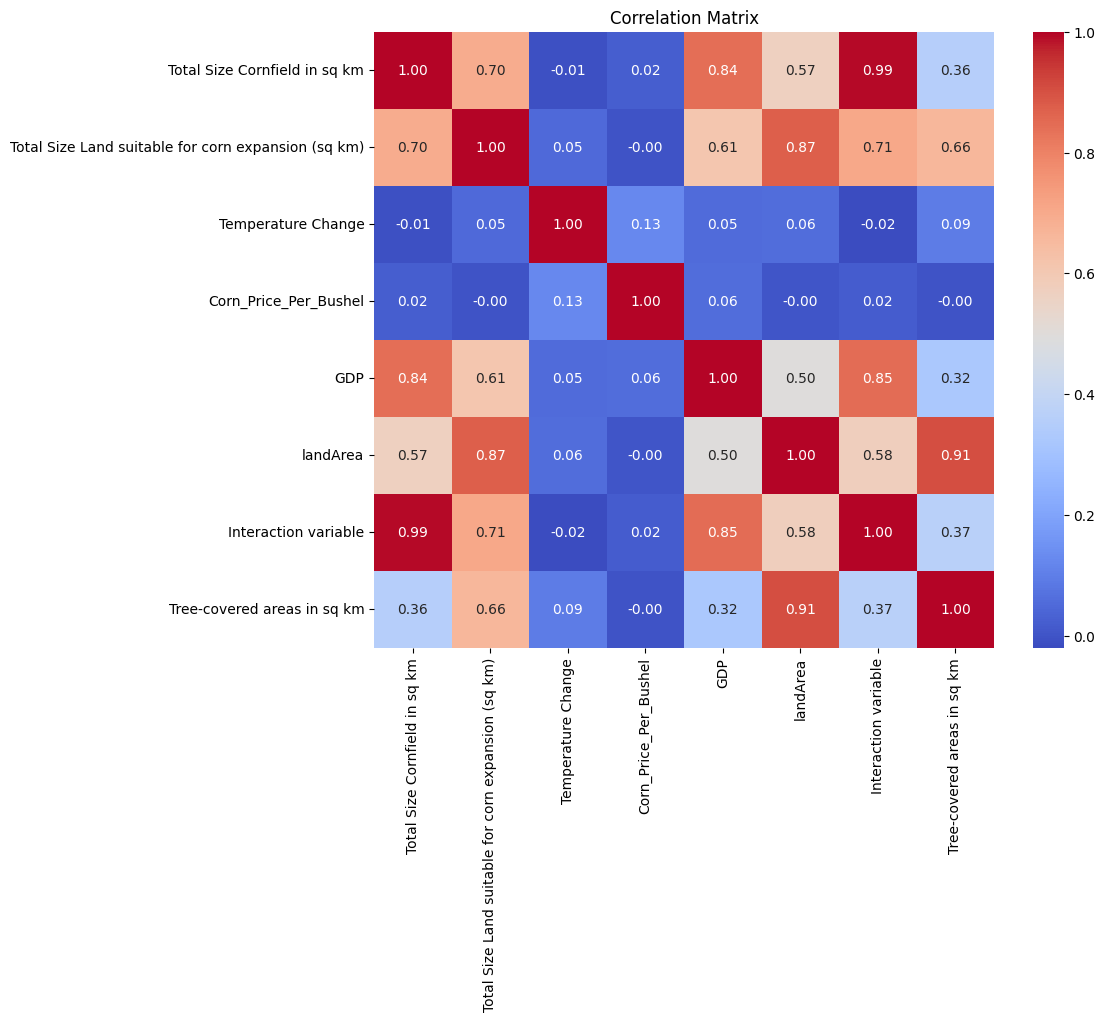

In [149]:
# Combine independent variables and dependent variable for the correlation matrix
variables = ind_x.drop(columns="const").join(dep_y.rename("Tree-covered areas in sq km"))

# Compute the correlation matrix
correlation_matrix = variables.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [150]:
last_df["Log Corn"]= np.log(last_df["Total Size Cornfield in sq km"])
last_df["Log Forest"]= np.log(last_df["Tree-covered areas in sq km"])
last_df["Log Land"]= np.log(last_df["landArea"])
last_df["loggdp"]= np.log(last_df['GDP'])
last_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),...,Suitable_Land_Higher_Than_Median,Demeaned_Cornfield_Area,Demeaned_Forest_Area,Suitable_Land_Higher_Than_Median_pct,Demeaned_Cornfield_Area_pct,Demeaned_Forest_Area_pct,Log Corn,Log Forest,Log Land,loggdp
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12281.1,239393.90,...,1,-514.690455,1.818989e-12,1,-0.078912,-2.220446e-16,6.866933,9.415817,13.388153,8.169583
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,1.852782,0.122656,11975.3,239553.90,...,1,-674.690455,1.818989e-12,1,-0.103444,-2.220446e-16,6.684612,9.390601,13.388153,8.194374
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,11851.1,239353.90,...,1,-474.690455,1.818989e-12,1,-0.072780,-2.220446e-16,6.907755,9.380176,13.388153,8.362920
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11735.3,237853.90,...,1,1025.309545,1.818989e-12,1,0.157201,-2.220446e-16,7.824046,9.370357,13.388153,8.496744
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11667.1,237853.90,...,1,1025.309545,1.818989e-12,1,0.157201,-2.220446e-16,7.824046,9.364528,13.388153,8.613244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,61.042885,1.928926,473443.9,17364.16,...,1,5456.480000,-8.422533e+03,0,0.734000,-1.132990e+00,9.570769,13.067789,13.518976,10.161815
1712,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,60.789707,1.460883,473059.8,20843.54,...,1,1977.100000,-1.030463e+04,0,0.265957,-1.386168e+00,9.292847,13.066977,13.518976,10.177780
1713,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,60.536515,1.132236,471995.7,23286.67,...,1,-466.030000,-1.218683e+04,0,-0.062690,-1.639359e+00,9.038000,13.064725,13.518976,10.056653
1714,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,471548.3,18368.41,...,1,4452.230000,-1.406893e+04,0,0.598909,-1.892537e+00,9.498162,13.063777,13.518976,9.801664


<Figure size 1000x600 with 0 Axes>

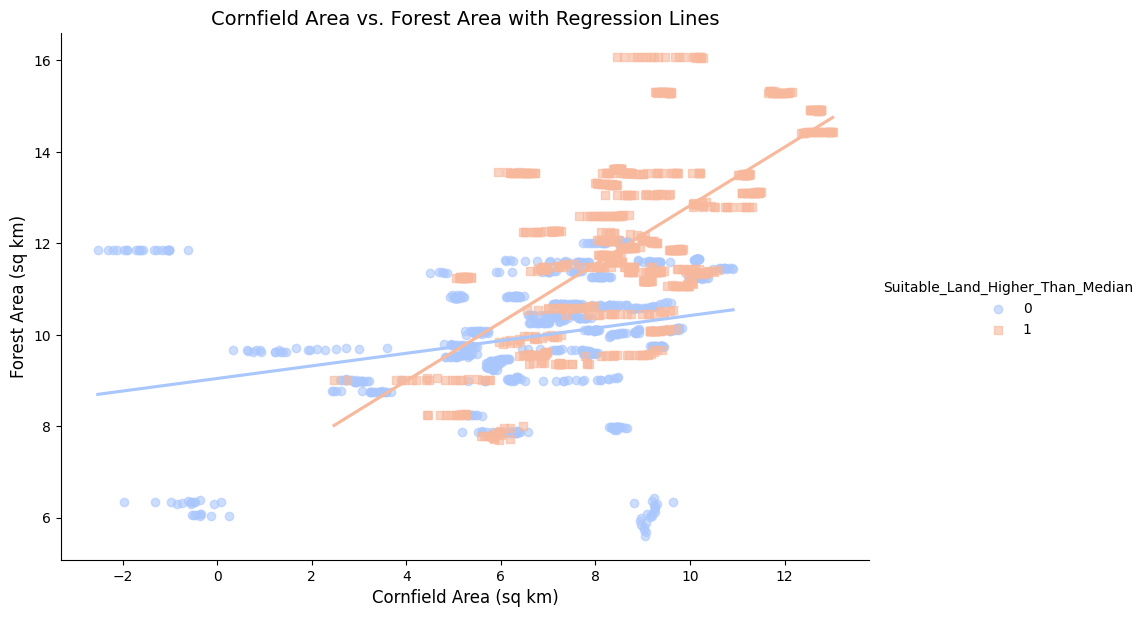

In [151]:
plt.figure(figsize=(10, 6))

# Create a scatterplot with regression lines
sns.lmplot(
    data=last_df,
    x='Log Corn',
    y='Log Forest',
    hue='Suitable_Land_Higher_Than_Median',
    palette='coolwarm',
    markers=['o', 's'],  # Different markers for each group
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Cornfield Area vs. Forest Area with Regression Lines', fontsize=14)
plt.xlabel('Cornfield Area (sq km)', fontsize=12)
plt.ylabel('Forest Area (sq km)', fontsize=12)

# Show the plot
plt.show()

In [152]:
ind_x = last_df[["Log Corn"]]

dep_y = last_df["Log Forest"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log Forest   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     714.4
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          7.54e-132
Time:                        17:52:20   Log-Likelihood:                -3263.4
No. Observations:                1716   AIC:                             6531.
Df Residuals:                    1714   BIC:                             6542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7754      0.126     61.859      0.000       7.529       8.022
Log Corn       0.4159      0.016     26.728      0.000       0.385       0.446
==============================================================================
Omnibus:                       73.808   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.533
Skew:                           0.172   Prob(JB):                     7.75e-44
Kurtosis:                       4.630   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
#Multivariable regression /w Temperature_Change
ind_x = last_df[["Log Corn","Total Size Land suitable for corn expansion (sq km)","Temperature Change","Corn_Price_Per_Bushel", "GDP", "Log Land"]]
ind_x["Interaction variable"] = last_df["Suitable_Land_Higher_Than_Median"]*ind_x["Log Corn"]

dep_y = last_df["Log Forest"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_22484/307650164.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log Forest   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     354.8
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:52:20   Log-Likelihood:                -2792.0
No. Observations:                1716   AIC:                             5600.
Df Residuals:                    1708   BIC:                             5643.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   4.0474      0.343     11.789      0.000       3.374       4.721
Log Corn                                                0.1360      0.015      9.135      0.000       0.107       0.165
Total Size Land suitable for corn expansion (sq km)  8.415e-07   1.04e-07      8.122      0.000    6.38e-07    1.04e-06
Temperature Change                                     -0.1466      0.056     -2.615      0.009      -0.257      -0.037
Corn_Price_Per_Bushel                                   0.0038      0.021      0.177      0.859      -0.038       0.045
GDP                                                 -6.789e-09   1.82e-08     -0.373      0.709   -4.25e-08    2.89e-08
Log Land                                                0.4465      0.030     14.940      0.000       0.388       0.505
Interaction variable                                    0.0645      0.010      6.455      0.000       0.045       0.084
==============================================================================
Omnibus:                      417.520   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1175.909
Skew:                          -1.251   Prob(JB):                    4.51e-256
Kurtosis:                       6.191   Cond. No.                     2.61e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
!pip install -U DoubleML

Defaulting to user installation because normal site-packages is not writeable


In [155]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [156]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [157]:
pip install doubleml

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [158]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [159]:
# Import necessary libraries
import numpy as np  # For numerical operations, especially array manipulation
import pandas as pd  # For data handling and manipulation using DataFrames
import graphviz as gr  # For creating and visualizing directed acyclic graphs (DAGs)

import statsmodels.formula.api as smf  # For statistical modeling using R-style formulas

import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
from matplotlib.colors import ListedColormap  # For creating custom colormaps for visualizations
import seaborn as sns  # For statistical data visualization based on matplotlib

from sklearn.model_selection import KFold, RepeatedKFold  # For cross-validation techniques
from sklearn.base import clone  # For cloning estimator objects

from sklearn.tree import DecisionTreeRegressor  # For Decision Tree regression models
from sklearn.ensemble import RandomForestRegressor  # For Random Forest regression models
from xgboost import XGBRegressor  # For XGBoost regression models

import doubleml as dml  # For Double/Debiased Machine Learning
from doubleml import DoubleMLClusterData  # For DoubleML data handling with clustered data

In [160]:
last_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),...,Suitable_Land_Higher_Than_Median,Demeaned_Cornfield_Area,Demeaned_Forest_Area,Suitable_Land_Higher_Than_Median_pct,Demeaned_Cornfield_Area_pct,Demeaned_Forest_Area_pct,Log Corn,Log Forest,Log Land,loggdp
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12281.1,239393.90,...,1,-514.690455,1.818989e-12,1,-0.078912,-2.220446e-16,6.866933,9.415817,13.388153,8.169583
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,1.852782,0.122656,11975.3,239553.90,...,1,-674.690455,1.818989e-12,1,-0.103444,-2.220446e-16,6.684612,9.390601,13.388153,8.194374
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,11851.1,239353.90,...,1,-474.690455,1.818989e-12,1,-0.072780,-2.220446e-16,6.907755,9.380176,13.388153,8.362920
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11735.3,237853.90,...,1,1025.309545,1.818989e-12,1,0.157201,-2.220446e-16,7.824046,9.370357,13.388153,8.496744
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11667.1,237853.90,...,1,1025.309545,1.818989e-12,1,0.157201,-2.220446e-16,7.824046,9.364528,13.388153,8.613244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,61.042885,1.928926,473443.9,17364.16,...,1,5456.480000,-8.422533e+03,0,0.734000,-1.132990e+00,9.570769,13.067789,13.518976,10.161815
1712,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,60.789707,1.460883,473059.8,20843.54,...,1,1977.100000,-1.030463e+04,0,0.265957,-1.386168e+00,9.292847,13.066977,13.518976,10.177780
1713,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,60.536515,1.132236,471995.7,23286.67,...,1,-466.030000,-1.218683e+04,0,-0.062690,-1.639359e+00,9.038000,13.064725,13.518976,10.056653
1714,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,471548.3,18368.41,...,1,4452.230000,-1.406893e+04,0,0.598909,-1.892537e+00,9.498162,13.063777,13.518976,9.801664


# COLS Renaming

In [161]:
last_df.keys()

Index(['Country', 'Year', 'landArea', 'iso3', 'Total Size Cornfield in ha',
       'Total Size Cornfield in sq km', '% of Forest Area',
       '% of Cornfield Area', 'Tree-covered areas in sq km',
       'Total Size Land suitable for corn expansion (sq km)',
       'Forest area (sq km)', '% Land available', 'Corn_Price_Per_Bushel',
       'Temperature Change', 'GDP', 'Suitable_Land_Higher_Than_Median',
       'Demeaned_Cornfield_Area', 'Demeaned_Forest_Area',
       'Suitable_Land_Higher_Than_Median_pct', 'Demeaned_Cornfield_Area_pct',
       'Demeaned_Forest_Area_pct', 'Log Corn', 'Log Forest', 'Log Land',
       'loggdp'],
      dtype='object')

In [162]:
last_df.rename(columns={'Total Size Cornfield in sq km':'corn',
                        'Tree-covered areas in sq km':'forest',
                        'Total Size Land suitable for corn expansion (sq km)':'suitability',
                        'Suitable_Land_Higher_Than_Median':'heterogeneityDummy',
                        'Corn_Price_Per_Bushel':'price',
                        'Temperature Change':'temperature',
                        'Log Corn':'logcorn',
                        'Log Forest':'logforest',
                        'Log Land':'logland',
                        'Year':'year',
                        'Country':'country',
                        'GDP':'gdp'},inplace=True)

In [163]:
last_df.keys()

Index(['country', 'year', 'landArea', 'iso3', 'Total Size Cornfield in ha',
       'corn', '% of Forest Area', '% of Cornfield Area', 'forest',
       'suitability', 'Forest area (sq km)', '% Land available', 'price',
       'temperature', 'gdp', 'heterogeneityDummy', 'Demeaned_Cornfield_Area',
       'Demeaned_Forest_Area', 'Suitable_Land_Higher_Than_Median_pct',
       'Demeaned_Cornfield_Area_pct', 'Demeaned_Forest_Area_pct', 'logcorn',
       'logforest', 'logland', 'loggdp'],
      dtype='object')

# **NO LOG ANALYSIS**

# SLR

In [164]:
# Define the model formula without controls
model_formula_no_controls = 'Q("forest") ~ Q("corn")'

# Fit the model using ordinary least squares (OLS)
# Use clustered standard errors
slr = smf.ols(formula=model_formula_no_controls, data=last_df).fit(cov_type='cluster', cov_kwds={'groups': last_df['country']})

# Store the model summary in a variable
slr_summary = slr.summary
slr_resid = slr.resid
slr_fit = slr.fittedvalues


# Print the model summary
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:            Q("forest")   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     12.00
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           0.000871
Time:                        17:52:23   Log-Likelihood:                -26478.
No. Observations:                1716   AIC:                         5.296e+04
Df Residuals:                    1714   BIC:                         5.297e+04
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.672e+05   1.35e+05      1.977      0.0

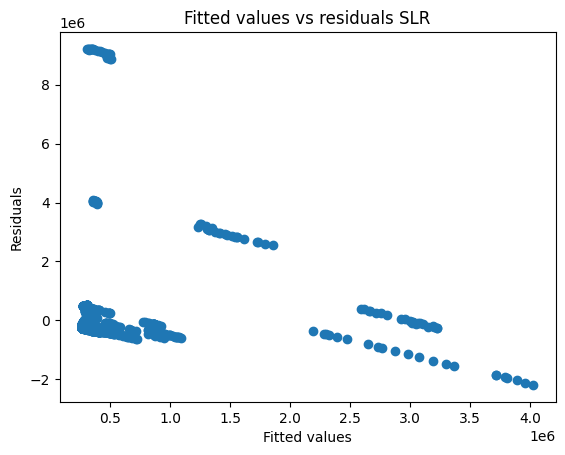

In [165]:
plt.figure()

plt.scatter(slr_fit, slr_resid)
plt.title('Fitted values vs residuals SLR')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')


plt.show()

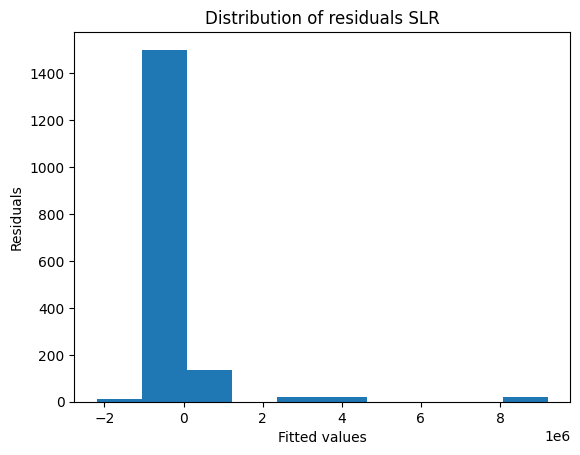

In [166]:
plt.figure()

plt.hist(slr_resid)
plt.title('Distribution of residuals SLR')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')


plt.show()

# MLR

In [167]:
# Define the model formula without controls
model_formula_no_controls = 'Q("forest") ~ Q("corn")+Q("temperature")+Q("price")+Q("gdp")+Q("suitability")+Q("landArea")'

# Fit the model using ordinary least squares (OLS)
# Use clustered standard errors
mlr = smf.ols(formula=model_formula_no_controls, data=last_df).fit(cov_type='cluster', cov_kwds={'groups': last_df['country']})

# Store the model summary in a variable
mlr_summary = mlr.summary
mlr_resid = mlr.resid
mlr_fit = mlr.fittedvalues


# Print the model summary
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:            Q("forest")   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     251.5
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.91e-48
Time:                        17:52:24   Log-Likelihood:                -24621.
No. Observations:                1716   AIC:                         4.926e+04
Df Residuals:                    1709   BIC:                         4.929e+04
Df Model:                           6                                         
Covariance Type:              cluster                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.806e+05   7.51e+04  

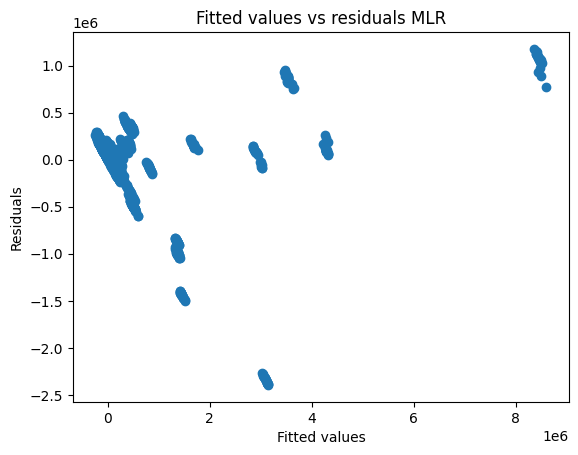

In [168]:
plt.figure()

plt.scatter(mlr_fit, mlr_resid)
plt.title('Fitted values vs residuals MLR')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')


plt.show()

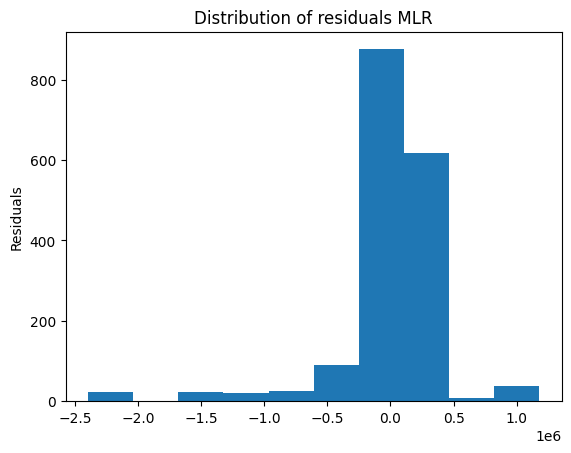

In [169]:
plt.figure()

plt.hist(mlr_resid)
plt.title('Distribution of residuals MLR')
plt.ylabel('Residuals')


plt.show()

# DML

In [170]:
# Create a DataFrame to store the coefficients and confidence intervals
summary_data = {
    'Model': ['Without Controls', 'With Controls'],
    'coef': [slr.params['Q("corn")'], mlr.params['Q("corn")']],
    '2.5 %': [slr.conf_int().loc['Q("corn")', 0], mlr.conf_int().loc['Q("corn")', 0]],
    '97.5 %': [slr.conf_int().loc['Q("corn")', 1], mlr.conf_int().loc['Q("corn")', 1]]
}
summary_df = pd.DataFrame(summary_data).set_index('Model')

# Print the summary
print(summary_df[['coef', '2.5 %', '97.5 %']])

                      coef     2.5 %     97.5 %
Model                                          
Without Controls  8.356541  3.628956  13.084127
With Controls    -2.642406 -9.259388   3.974575


In [171]:
# Create a DoubleMLClusterData object to prepare the data for Double Machine Learning.
# This object specifies the outcome variable ('y'), treatment variable ('x'),
# clustering variable ('id'), and confounders ('x_cols').
obj_dml_data_from_df = DoubleMLClusterData(last_df, "forest", "corn", ['country'], 
                                               x_cols=["temperature", "price", "gdp", "landArea", "suitability"])

# Print the DoubleMLClusterData object to display its properties and data information.
print(obj_dml_data_from_df)

================== DoubleMLClusterData Object ==================

------------------ Data summary      ------------------
Outcome variable: forest
Treatment variable(s): ['corn']
Cluster variable(s): ['country']
Covariates: ['temperature', 'price', 'gdp', 'landArea', 'suitability']
Instrument variable(s): None
No. Observations: 1716

------------------ DataFrame info    ------------------
<class 'wbdata.client.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Columns: 25 entries, country to loggdp
dtypes: float64(21), int64(2), object(2)
memory usage: 335.3+ KB



In [172]:
# Estimate the ATE using Decision Trees as the machine learning model


# Define a Decision Tree Regressor with simple, fixed parameters
tree_model = DecisionTreeRegressor(
    max_depth=10,  # Limit the depth of the tree to prevent overfitting
    min_samples_split=50,  # Minimum samples required to split a node
    min_samples_leaf=20  # Minimum samples required to be at a leaf node
)

# Initialize DoubleMLPLR with the Decision Tree model for both outcome and treatment models
dml_tree= dml.DoubleMLPLR(
    obj_dml_data_from_df,   # This is the DoubleML data object
    ml_l=tree_model,  # Decision Tree model for outcome regression
    ml_m=tree_model,  # Decision Tree model for treatment regression
    n_folds=2         # Use 3-fold cross-fitting (simpler for students to understand)
    #change to 2 folds because of the nb of cofounder --> check if right
)

# Fit the DoubleMLPLR model
dml_tree.fit(store_predictions=True)

# Store the model summary in a variable
tree_summary = dml_tree.summary # Assigns the model summary to the 'forest_summary' variable

# Display the summary of the estimated Average Treatment Effect (ATE)
print(dml_tree.summary)

          coef   std err         t     P>|t|     2.5 %    97.5 %
corn -3.118516  2.958686 -1.054021  0.291873 -8.917435  2.680402


In [173]:
# Estimate the ATE using Random Forest as the machine learning model

# randomForest: Initialize a Random Forest Regressor for outcome regression
randomForest = RandomForestRegressor(
    n_estimators=500,  # Number of trees in the forest
    max_depth=7,  # Maximum depth of each tree
    max_features=3,  # Number of features to consider when looking for the best split
    min_samples_leaf=3)  # Minimum number of samples required to be at a leaf node

# Initialize the DoubleMLPLR model with Random Forest learners
dml_plr_forest = dml.DoubleMLPLR(obj_dml_data_from_df,  # Uses the 'data_dml_base' DoubleMLData object
                                 ml_l=randomForest,  # Specifies the Random Forest Regressor for outcome regression
                                 ml_m=randomForest,  # Specifies the Random Forest Classifier for treatment regression
                                 n_folds=2)  # Sets the number of folds for cross-fitting to 3

# Fit the DoubleMLPLR model to the data
dml_plr_forest.fit(store_predictions=True)  # Fits the model and stores predictions

# Store the model summary in a variable
forest_summary = dml_plr_forest.summary  # Assigns the model summary to the 'forest_summary' variable

# Print the model summary
print(forest_summary)  # Displays the estimated ATE and other model information

          coef   std err         t     P>|t|      2.5 %   97.5 %
corn -7.776593  7.149128 -1.087768  0.276698 -21.788625  6.23544


In [174]:
# Estimate the ATE using Boosted Trees (XGBoost) as the machine learning model

# boost: Initialize an XGBoost Regressor for outcome regression
boost = XGBRegressor(n_jobs=1,  # Number of parallel threads used to run XGBoost
                     objective="reg:squarederror",  # Objective function for regression (squared error)
                     eta=0.1,  # Learning rate
                     n_estimators=35)  # Number of boosting rounds (trees)


# Set the random seed for reproducibility
np.random.seed(123)  # Ensures consistent results

# Initialize the DoubleMLPLR model with XGBoost learners
dml_plr_boost = dml.DoubleMLPLR(obj_dml_data_from_df,  # Uses the 'data_dml_base' DoubleMLData object
                                ml_l=boost,  # Specifies the XGBoost Regressor for outcome regression
                                ml_m=boost,  # Specifies the XGBoost Classifier for treatment regression
                                n_folds=2)  # Sets the number of folds for cross-fitting to 3

# Fit the DoubleMLPLR model to the data
dml_plr_boost.fit(store_predictions=True)  # Fits the model and stores predictions

# Store the model summary in a variable
boost_summary = dml_plr_boost.summary  # Assigns the model summary to the 'boost_summary' variable

# Print the model summary
print(boost_summary)  # Displays the estimated ATE and other model information

          coef   std err         t     P>|t|     2.5 %    97.5 %
corn -2.398411  2.251528 -1.065237  0.286769 -6.811325  2.014503


# Comparison of algorithms

In [175]:
# Concatenate the summaries and update the index
plr_summary = pd.concat([summary_df, tree_summary, forest_summary, boost_summary])
plr_summary.index = ['slr', 'mlr', 'tree', 'forest', 'xgb']

# Print the updated summary
print(plr_summary[['coef', '2.5 %', '97.5 %']])

            coef      2.5 %     97.5 %
slr     8.356541   3.628956  13.084127
mlr    -2.642406  -9.259388   3.974575
tree   -3.118516  -8.917435   2.680402
forest -7.776593 -21.788625   6.235440
xgb    -2.398411  -6.811325   2.014503


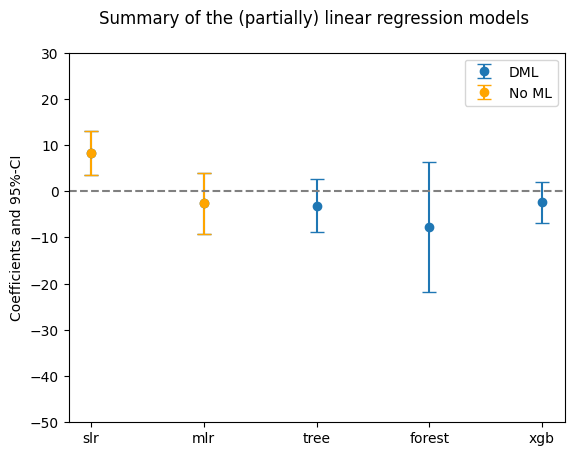

In [176]:
errors = np.full((2, plr_summary.shape[0]), np.nan)
errors[0, :] = plr_summary['coef'] - plr_summary['2.5 %']
errors[1, :] = plr_summary['97.5 %'] - plr_summary['coef']
# Plot error bars for all models
plt.errorbar(plr_summary.index, plr_summary['coef'], yerr=errors, fmt='o', capsize=5)

# Plot the first two coefficients in orange
plt.errorbar(plr_summary.index[:2], plr_summary['coef'][:2], yerr=errors[:, :2], fmt='o', color='orange', capsize=5)

plt.ylim([-50, 30])

plt.legend(['DML', 'No ML'], loc='upper right')  # Place legend in upper left corner

#add horizontal bar at 0
plt.axhline(y=0, color='gray', linestyle='--')

plt.title('Summary of the (partially) linear regression models \n')
_ =  plt.ylabel('Coefficients and 95%-CI')

# **LOG ANALYSIS**

# SLR

In [177]:
# Define the model formula without controls
model_formula_no_controls = 'Q("logforest") ~ Q("logcorn")'

# Fit the model using ordinary least squares (OLS)
# Use clustered standard errors
logslr = smf.ols(formula=model_formula_no_controls, data=last_df).fit(cov_type='cluster', cov_kwds={'groups': last_df['country']})

# Store the model summary in a variable
logslr_summary = logslr.summary
logslr_resid = logslr.resid
logslr_fit = logslr.fittedvalues


# Print the model summary
print(logslr.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("logforest")   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     15.42
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           0.000186
Time:                        17:52:25   Log-Likelihood:                -3263.4
No. Observations:                1716   AIC:                             6531.
Df Residuals:                    1714   BIC:                             6542.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.7754      0.849      9.156   

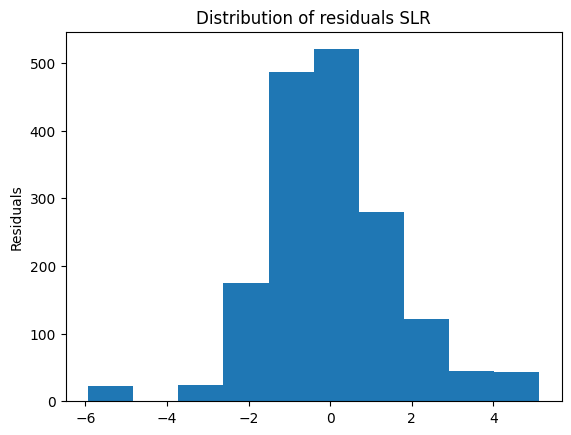

In [178]:
plt.figure()

plt.hist(logslr_resid)
plt.title('Distribution of residuals SLR')
plt.ylabel('Residuals')


plt.show()

# MLR

In [179]:
# Define the model formula without controls
model_formula_no_controls = 'Q("logforest") ~ Q("logcorn")+Q("temperature")+Q("price")+Q("loggdp")+Q("logland")+Q("suitability")'

# Fit the model using ordinary least squares (OLS)
# Use clustered standard errors
logmlr = smf.ols(formula=model_formula_no_controls, data=last_df).fit(cov_type='cluster', cov_kwds={'groups': last_df['country']})

# Store the model summary in a variable
logmlr_summary = logmlr.summary
logmlr_resid = logmlr.resid
logmlr_fit = logmlr.fittedvalues

# Print the model summary
print(logmlr.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("logforest")   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     27.60
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           2.48e-17
Time:                        17:52:25   Log-Likelihood:                -2805.6
No. Observations:                1716   AIC:                             5625.
Df Residuals:                    1709   BIC:                             5663.
Df Model:                           6                                         
Covariance Type:              cluster                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.6260      1.240  

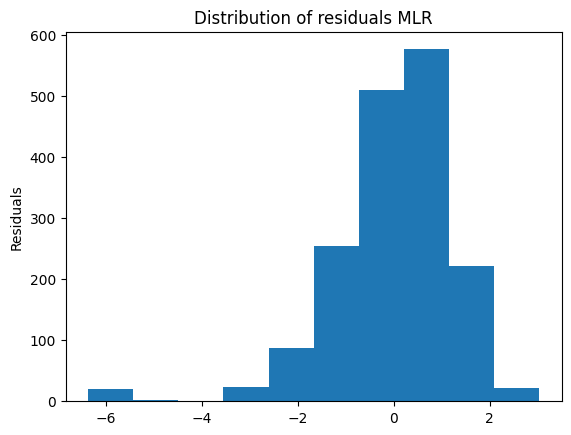

In [180]:
plt.figure()

plt.hist(logmlr_resid)
plt.title('Distribution of residuals MLR')
plt.ylabel('Residuals')


plt.show()

# DML

In [181]:
# Create a DataFrame to store the coefficients and confidence intervals
logsummary_data = {
    'Model': ['Without Controls', 'With Controls'],
    'coef': [logslr.params['Q("logcorn")'], logmlr.params['Q("logcorn")']],
    '2.5 %': [logslr.conf_int().loc['Q("logcorn")', 0], logmlr.conf_int().loc['Q("logcorn")', 0]],
    '97.5 %': [logslr.conf_int().loc['Q("logcorn")', 1], logmlr.conf_int().loc['Q("logcorn")', 1]]
}
logsummary_df = pd.DataFrame(logsummary_data).set_index('Model')

# Print the summary
print(logsummary_df[['coef', '2.5 %', '97.5 %']])

                      coef     2.5 %    97.5 %
Model                                         
Without Controls  0.415886  0.208291  0.623480
With Controls     0.144964 -0.028841  0.318768


In [182]:
# Create a DoubleMLClusterData object to prepare the data for Double Machine Learning.
# This object specifies the outcome variable ('y'), treatment variable ('x'),
# clustering variable ('id'), and confounders ('x_cols').
logobj_dml_data_from_df = DoubleMLClusterData(last_df, "logforest", "logcorn", ['country'], 
                                               x_cols=["temperature", "price", "loggdp", "logland", "suitability"])

# Print the DoubleMLClusterData object to display its properties and data information.
print(logobj_dml_data_from_df)

================== DoubleMLClusterData Object ==================

------------------ Data summary      ------------------
Outcome variable: logforest
Treatment variable(s): ['logcorn']
Cluster variable(s): ['country']
Covariates: ['temperature', 'price', 'loggdp', 'logland', 'suitability']
Instrument variable(s): None
No. Observations: 1716

------------------ DataFrame info    ------------------
<class 'wbdata.client.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Columns: 25 entries, country to loggdp
dtypes: float64(21), int64(2), object(2)
memory usage: 335.3+ KB



In [183]:
# Estimate the ATE using Decision Trees as the machine learning model


# Define a Decision Tree Regressor with simple, fixed parameters
tree_model = DecisionTreeRegressor(
    max_depth=10,  # Limit the depth of the tree to prevent overfitting
    min_samples_split=50,  # Minimum samples required to split a node
    min_samples_leaf=20  # Minimum samples required to be at a leaf node
)

# Initialize DoubleMLPLR with the Decision Tree model for both outcome and treatment models
logdml_tree= dml.DoubleMLPLR(
    logobj_dml_data_from_df,   # This is the DoubleML data object
    ml_l=tree_model,  # Decision Tree model for outcome regression
    ml_m=tree_model,  # Decision Tree model for treatment regression
    n_folds=2         # Use 3-fold cross-fitting (simpler for students to understand)
    #change to 2 folds because of the nb of cofounder --> check if right
)

# Fit the DoubleMLPLR model
logdml_tree.fit(store_predictions=True)

# Store the model summary in a variable
logtree_summary = logdml_tree.summary  # Assigns the model summary to the 'forest_summary' variable


# Display the summary of the estimated Average Treatment Effect (ATE)
print(logdml_tree.summary)

            coef   std err         t     P>|t|     2.5 %    97.5 %
logcorn  0.18651  0.087855  2.122935  0.033759  0.014318  0.358701


In [184]:
# Estimate the ATE using Random Forest as the machine learning model

# randomForest: Initialize a Random Forest Regressor for outcome regression
randomForest = RandomForestRegressor(
    n_estimators=500,  # Number of trees in the forest
    max_depth=7,  # Maximum depth of each tree
    max_features=3,  # Number of features to consider when looking for the best split
    min_samples_leaf=3)  # Minimum number of samples required to be at a leaf node

# Initialize the DoubleMLPLR model with Random Forest learners
logdml_plr_forest = dml.DoubleMLPLR(logobj_dml_data_from_df,  # Uses the 'data_dml_base' DoubleMLData object
                                 ml_l=randomForest,  # Specifies the Random Forest Regressor for outcome regression
                                 ml_m=randomForest,  # Specifies the Random Forest Classifier for treatment regression
                                 n_folds=2)  # Sets the number of folds for cross-fitting to 3

# Fit the DoubleMLPLR model to the data
logdml_plr_forest.fit(store_predictions=True)  # Fits the model and stores predictions

# Store the model summary in a variable
logforest_summary = logdml_plr_forest.summary  # Assigns the model summary to the 'forest_summary' variable

# Print the model summary
print(logforest_summary)  # Displays the estimated ATE and other model information

             coef   std err        t     P>|t|     2.5 %    97.5 %
logcorn  0.300544  0.117363  2.56082  0.010443  0.070518  0.530571


In [185]:
# Estimate the ATE using Boosted Trees (XGBoost) as the machine learning model

# boost: Initialize an XGBoost Regressor for outcome regression
boost = XGBRegressor(n_jobs=1,  # Number of parallel threads used to run XGBoost
                     objective="reg:squarederror",  # Objective function for regression (squared error)
                     eta=0.1,  # Learning rate
                     n_estimators=35)  # Number of boosting rounds (trees)


# Set the random seed for reproducibility
np.random.seed(123)  # Ensures consistent results

# Initialize the DoubleMLPLR model with XGBoost learners
logdml_plr_boost = dml.DoubleMLPLR(logobj_dml_data_from_df,  # Uses the 'data_dml_base' DoubleMLData object
                                ml_l=boost,  # Specifies the XGBoost Regressor for outcome regression
                                ml_m=boost,  # Specifies the XGBoost Classifier for treatment regression
                                n_folds=2)  # Sets the number of folds for cross-fitting to 3

# Fit the DoubleMLPLR model to the data
logdml_plr_boost.fit(store_predictions=True)  # Fits the model and stores predictions

# Store the model summary in a variable
logboost_summary = logdml_plr_boost.summary  # Assigns the model summary to the 'boost_summary' variable

# Print the model summary
print(logboost_summary)  # Displays the estimated ATE and other model information

             coef   std err         t     P>|t|     2.5 %   97.5 %
logcorn  0.138703  0.068107  2.036545  0.041696  0.005216  0.27219


# Comparison of algorithms

In [186]:
# Concatenate the summaries and update the index
logplr_summary = pd.concat([logsummary_df, logtree_summary, logforest_summary, logboost_summary])
logplr_summary.index = ['slr', 'mlr', 'tree', 'forest', 'xgb']

# Print the updated summary
print(logplr_summary[['coef', '2.5 %', '97.5 %']])

            coef     2.5 %    97.5 %
slr     0.415886  0.208291  0.623480
mlr     0.144964 -0.028841  0.318768
tree    0.186510  0.014318  0.358701
forest  0.300544  0.070518  0.530571
xgb     0.138703  0.005216  0.272190


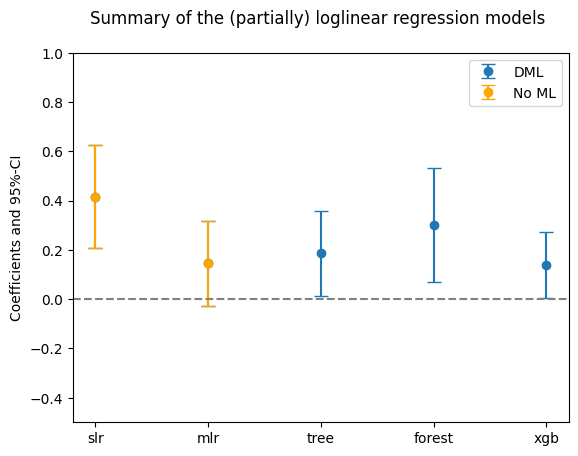

In [187]:
errors = np.full((2, logplr_summary.shape[0]), np.nan)
errors[0, :] = logplr_summary['coef'] - logplr_summary['2.5 %']
errors[1, :] = logplr_summary['97.5 %'] - logplr_summary['coef']
# Plot error bars for all models
plt.errorbar(logplr_summary.index, logplr_summary['coef'], yerr=errors, fmt='o', capsize=5)

# Plot the first two coefficients in orange
plt.errorbar(logplr_summary.index[:2], logplr_summary['coef'][:2], yerr=errors[:, :2], fmt='o', color='orange', capsize=5)

plt.ylim([-.5,1])

plt.legend(['DML', 'No ML'], loc='upper right')  # Place legend in upper left corner

#add horizontal bar at 1
plt.axhline(y=0, color='gray', linestyle='--')

plt.title('Summary of the (partially) loglinear regression models \n')
_ =  plt.ylabel('Coefficients and 95%-CI')

# **FIXED EFFECTS**

In [188]:
!pip install linearmodels

Defaulting to user installation because normal site-packages is not writeable


In [189]:
from linearmodels.panel import PanelOLS
from statsmodels.tools import add_constant

In [190]:
last_df['country'] = last_df['country'].astype('category')
last_df['year'] = last_df['year'].astype('int')

In [191]:
print(last_df['country'].dtype, last_df['year'].dtype)

category int64


In [192]:
last_df[(last_df['country'] == 'Afghanistan') & (last_df['year'] == 2000)]

,country,year,landArea,iso3,Total Size Cornfield in ha,corn,% of Forest Area,% of Cornfield Area,forest,suitability,...,heterogeneityDummy,Demeaned_Cornfield_Area,Demeaned_Forest_Area,Suitable_Land_Higher_Than_Median_pct,Demeaned_Cornfield_Area_pct,Demeaned_Forest_Area_pct,logcorn,logforest,logland,loggdp
0,Afghanistan,2000,652230.0,AFG,96000.0,960.0,1.852782,0.147187,12281.1,239393.9,...,1,-514.690455,1.818989e-12,1,-0.078912,-2.220446e-16,6.866933,9.415817,13.388153,8.169583


In [193]:
last_df.keys()

Index(['country', 'year', 'landArea', 'iso3', 'Total Size Cornfield in ha',
       'corn', '% of Forest Area', '% of Cornfield Area', 'forest',
       'suitability', 'Forest area (sq km)', '% Land available', 'price',
       'temperature', 'gdp', 'heterogeneityDummy', 'Demeaned_Cornfield_Area',
       'Demeaned_Forest_Area', 'Suitable_Land_Higher_Than_Median_pct',
       'Demeaned_Cornfield_Area_pct', 'Demeaned_Forest_Area_pct', 'logcorn',
       'logforest', 'logland', 'loggdp'],
      dtype='object')

# NO LOG FE

In [194]:
fe = last_df[['country', 'year', 'landArea', 'iso3', 'corn', 'forest', 'suitability', 'price', 'temperature', 
              'gdp', 'heterogeneityDummy', 'logcorn', 'logforest', 'logland', 'loggdp']]

In [195]:
fe = fe.set_index(['country', 'year'])

In [196]:
fe.index

MultiIndex([('Afghanistan', 2000),
            ('Afghanistan', 2001),
            ('Afghanistan', 2002),
            ('Afghanistan', 2003),
            ('Afghanistan', 2004),
            ('Afghanistan', 2005),
            ('Afghanistan', 2006),
            ('Afghanistan', 2007),
            ('Afghanistan', 2008),
            ('Afghanistan', 2009),
            ...
            (     'Zambia', 2012),
            (     'Zambia', 2013),
            (     'Zambia', 2014),
            (     'Zambia', 2015),
            (     'Zambia', 2016),
            (     'Zambia', 2017),
            (     'Zambia', 2018),
            (     'Zambia', 2019),
            (     'Zambia', 2020),
            (     'Zambia', 2021)],
           names=['country', 'year'], length=1716)

In [197]:
Y = fe['forest']
X = fe[['corn', 'gdp', 'suitability', 'price', 'temperature', 'landArea']]
X = add_constant(X)

In [198]:
model = PanelOLS(dependent=Y, exog=X, entity_effects=True, time_effects=True, drop_absorbed=True)
results = model.fit()

fe_data = {
    'Model': 'FE',
    'coef': results.params['corn'],
    '2.5 %': results.conf_int().loc['corn', 'lower'],
    '97.5 %': results.conf_int().loc['corn', 'upper']
}
fe_data = pd.DataFrame([fe_data]).set_index('Model')
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 forest   R-squared:                        0.0239
Estimator:                   PanelOLS   R-squared (Between):              0.7701
No. Observations:                1716   R-squared (Within):               0.0298
Date:                Thu, Dec 05 2024   R-squared (Overall):              0.7700
Time:                        17:52:28   Log-likelihood                -1.815e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      9.8747
Entities:                          78   P-value                           0.0000
Avg Obs:                       22.000   Distribution:                  F(4,1613)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             9.8747
                            

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this wa

In [199]:
# Concatenate the summaries and update the index
plr_summary = pd.concat([summary_df, tree_summary, forest_summary, boost_summary, fe_data])
plr_summary.index = ['slr', 'mlr', 'tree', 'forest', 'xgb', 'fe']

# Print the updated summary
print(plr_summary[['coef', '2.5 %', '97.5 %']])

            coef      2.5 %     97.5 %
slr     8.356541   3.628956  13.084127
mlr    -2.642406  -9.259388   3.974575
tree   -3.118516  -8.917435   2.680402
forest -7.776593 -21.788625   6.235440
xgb    -2.398411  -6.811325   2.014503
fe      0.015397  -0.061805   0.092599


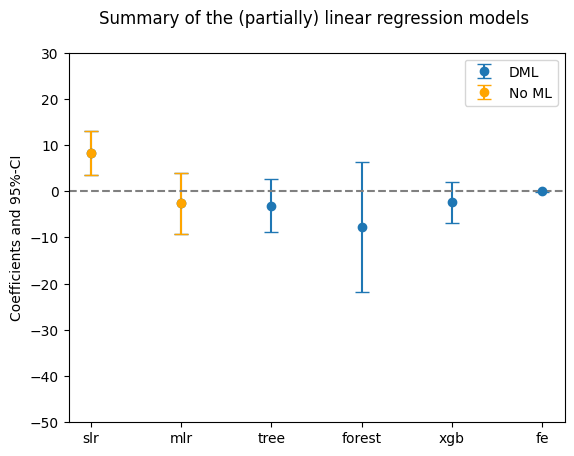

In [200]:
errors = np.full((2, plr_summary.shape[0]), np.nan)
errors[0, :] = plr_summary['coef'] - plr_summary['2.5 %']
errors[1, :] = plr_summary['97.5 %'] - plr_summary['coef']
# Plot error bars for all models
plt.errorbar(plr_summary.index, plr_summary['coef'], yerr=errors, fmt='o', capsize=5)

# Plot the first two coefficients in orange
plt.errorbar(plr_summary.index[:2], plr_summary['coef'][:2], yerr=errors[:, :2], fmt='o', color='orange', capsize=5)

plt.ylim([-50, 30])

plt.legend(['DML', 'No ML'], loc='upper right')  # Place legend in upper left corner

#add horizontal bar at 0
plt.axhline(y=0, color='gray', linestyle='--')

plt.title('Summary of the (partially) linear regression models \n')
_ =  plt.ylabel('Coefficients and 95%-CI')

# LOG FE

In [201]:
logfe = fe

In [202]:
logY = fe['logforest']
logX = fe[['logcorn', 'loggdp', 'logland', 'suitability', 'price', 'temperature']]
logX = add_constant(logX)

In [203]:
logmodel = PanelOLS(dependent=logY, exog=logX, entity_effects=True, time_effects=True, drop_absorbed=True)
log_feresults = logmodel.fit()

logfe_data = {
    'Model': 'FE',
    'coef': log_feresults.params['logcorn'],
    '2.5 %': log_feresults.conf_int().loc['logcorn', 'lower'],
    '97.5 %': log_feresults.conf_int().loc['logcorn', 'upper']
}

logfe_data = pd.DataFrame([logfe_data]).set_index('Model')

print(log_feresults)

                          PanelOLS Estimation Summary                           
Dep. Variable:              logforest   R-squared:                        0.0450
Estimator:                   PanelOLS   R-squared (Between):             -2.0229
No. Observations:                1716   R-squared (Within):               0.0527
Date:                Thu, Dec 05 2024   R-squared (Overall):             -2.0221
Time:                        17:52:28   Log-likelihood                    3241.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      15.204
Entities:                          78   P-value                           0.0000
Avg Obs:                       22.000   Distribution:                  F(5,1612)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             15.204
                            

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this wa

In [204]:
# Concatenate the summaries and update the index
logplr_summary = pd.concat([logsummary_df, logtree_summary, logforest_summary, logboost_summary, logfe_data])
logplr_summary.index = ['slr', 'mlr', 'tree', 'forest', 'xgb', 'fe']

# Print the updated summary
print(logplr_summary[['coef', '2.5 %', '97.5 %']])

            coef     2.5 %    97.5 %
slr     0.415886  0.208291  0.623480
mlr     0.144964 -0.028841  0.318768
tree    0.186510  0.014318  0.358701
forest  0.300544  0.070518  0.530571
xgb     0.138703  0.005216  0.272190
fe      0.002177 -0.003513  0.007868


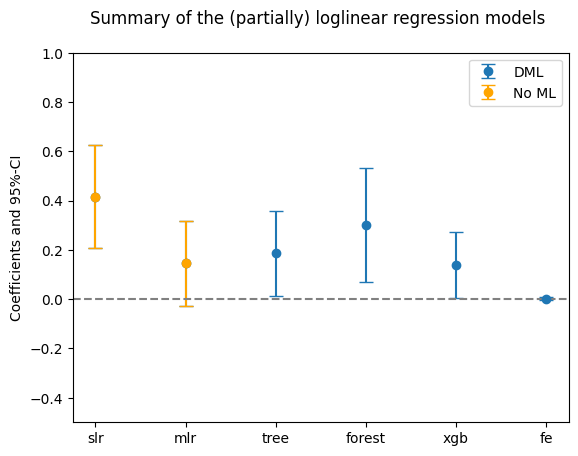

In [205]:
errors = np.full((2, logplr_summary.shape[0]), np.nan)
errors[0, :] = logplr_summary['coef'] - logplr_summary['2.5 %']
errors[1, :] = logplr_summary['97.5 %'] - logplr_summary['coef']
# Plot error bars for all models
plt.errorbar(logplr_summary.index, logplr_summary['coef'], yerr=errors, fmt='o', capsize=5)

# Plot the first two coefficients in orange
plt.errorbar(logplr_summary.index[:2], logplr_summary['coef'][:2], yerr=errors[:, :2], fmt='o', color='orange', capsize=5)

plt.ylim([-.5,1])

plt.legend(['DML', 'No ML'], loc='upper right')  # Place legend in upper left corner

#add horizontal bar at 1
plt.axhline(y=0, color='gray', linestyle='--')

plt.title('Summary of the (partially) loglinear regression models \n')
_ =  plt.ylabel('Coefficients and 95%-CI')

In [206]:
last_df

,country,year,landArea,iso3,Total Size Cornfield in ha,corn,% of Forest Area,% of Cornfield Area,forest,suitability,...,heterogeneityDummy,Demeaned_Cornfield_Area,Demeaned_Forest_Area,Suitable_Land_Higher_Than_Median_pct,Demeaned_Cornfield_Area_pct,Demeaned_Forest_Area_pct,logcorn,logforest,logland,loggdp
0,Afghanistan,2000,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12281.1,239393.90,...,1,-514.690455,1.818989e-12,1,-0.078912,-2.220446e-16,6.866933,9.415817,13.388153,8.169583
1,Afghanistan,2001,652230.0,AFG,80000.0,800.00,1.852782,0.122656,11975.3,239553.90,...,1,-674.690455,1.818989e-12,1,-0.103444,-2.220446e-16,6.684612,9.390601,13.388153,8.194374
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,11851.1,239353.90,...,1,-474.690455,1.818989e-12,1,-0.072780,-2.220446e-16,6.907755,9.380176,13.388153,8.362920
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11735.3,237853.90,...,1,1025.309545,1.818989e-12,1,0.157201,-2.220446e-16,7.824046,9.370357,13.388153,8.496744
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,11667.1,237853.90,...,1,1025.309545,1.818989e-12,1,0.157201,-2.220446e-16,7.824046,9.364528,13.388153,8.613244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,Zambia,2017,743390.0,ZMB,1433944.0,14339.44,61.042885,1.928926,473443.9,17364.16,...,1,5456.480000,-8.422533e+03,0,0.734000,-1.132990e+00,9.570769,13.067789,13.518976,10.161815
1712,Zambia,2018,743390.0,ZMB,1086006.0,10860.06,60.789707,1.460883,473059.8,20843.54,...,1,1977.100000,-1.030463e+04,0,0.265957,-1.386168e+00,9.292847,13.066977,13.518976,10.177780
1713,Zambia,2019,743390.0,ZMB,841693.0,8416.93,60.536515,1.132236,471995.7,23286.67,...,1,-466.030000,-1.218683e+04,0,-0.062690,-1.639359e+00,9.038000,13.064725,13.518976,10.056653
1714,Zambia,2020,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,471548.3,18368.41,...,1,4452.230000,-1.406893e+04,0,0.598909,-1.892537e+00,9.498162,13.063777,13.518976,9.801664


In [ ]:
#last_df.to_csv('output.csv', index=False) #save the data to a csv file

In [211]:
# Step 0: Load and prepare the dataset
df_full = pd.read_csv(filepath + 'Database.csv')

#some cofounders that might be useful, my domain knowledge tells me that these are important
# Define variables of interest for initial analysis
variables_of_interest = ['country', 'year', 'corn', 'forest', 'suitability', 'price', 'temperature', 'gdp', 'heterogeneityDummy']
df_cleaned = df_full[variables_of_interest]

#this step is only necessary, if you don't have the data already cleaned, not the case for me
# Drop rows with missing values and apply transformations
#df_cleaned = df_cleaned.dropna()
#df_cleaned['wdi_co2'] = df_cleaned['wdi_co2'] * 1000
#df_cleaned['pg_regtoreen'] = df_cleaned['pg_regtoreen'] / 1000
#df_cleaned = pd.get_dummies(df_cleaned, columns=['ccodealp'], drop_first=False)

# Merge df_cleaned with df_full and retain only perfect matches
#df_merged = pd.merge(df_cleaned[['cname', 'year']], df_full, on=['cname', 'year'], how='left')
#perfect_match_columns = [col for col in df_merged.columns if df_merged[col].notna().all()]
#df = df_merged[perfect_match_columns]
df = df_cleaned


#drop non necessary columns
# don't want to work with the identifiers
#df = df.drop([ 'cname','ccode', 'ccode_qog', 'cname_qog', 'ccodecow', 'version', 'cname_year', 'ccodealp_year'], axis=1)

# Sort the DataFrame by 'id' and 'year' to ensure correct ordering
#df = df.sort_values(['ccodealp', 'year']).reset_index(drop=True)

df.head()

,country,year,corn,forest,suitability,price,temperature,gdp,heterogeneityDummy
0,Afghanistan,2000,960.0,12281.1,239393.9,2.3175,1.064,3531.869351,1
1,Afghanistan,2001,800.0,11975.3,239553.9,2.0900,1.377,3620.525250,1
2,Afghanistan,2002,1000.0,11851.1,239353.9,2.3575,1.457,4285.191376,1
3,Afghanistan,2003,2500.0,11735.3,237853.9,2.4600,0.710,4898.791114,1
4,Afghanistan,2004,2500.0,11667.1,237853.9,2.0475,1.482,5504.073142,1


In [212]:
# Compute the first difference for each variable in order to capture individual fixed effects
# if use the fix effect

# Identify columns to compute first differences (all the columns in this case)
exclude_columns = ['country', 'year']
columns_to_diff = df.columns[~df.columns.isin(exclude_columns)]

# Sort the DataFrame by 'id' and 'year' to ensure correct ordering
df_sorted = df.sort_values(['country', 'year']).reset_index(drop=True)

# Compute the first difference within each individual group
df_s = df_sorted.groupby('country')[columns_to_diff].diff().dropna()  # Drop NaN for the first observation in each group


# Display the first-differenced DataFrame
df_s.head()

,corn,forest,suitability,price,temperature,gdp,heterogeneityDummy
1,-160.0,-305.8,160.0,-0.2275,0.313,88.655899,0.0
2,200.0,-124.2,-200.0,0.2675,0.080,664.666126,0.0
3,1500.0,-115.8,-1500.0,0.1025,-0.747,613.599738,0.0
4,0.0,-68.2,0.0,-0.4125,0.772,605.282028,0.0
5,110.0,-15.7,-110.0,0.1100,-0.969,970.906693,0.0


In [217]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

def hybrid_variable_selection_with_iv(data, x_col, y_col, lambdas=0.01, pval_threshold=0.1, max_features=10):
    """
    Hybrid approach to select confounders and instruments using Lasso and Multiple Linear Regression,
    with a cap on the number of variables selected by Lasso.

    Parameters:
    - data: pd.DataFrame, input dataset with all variables.
    - x_col: str, name of the treatment variable (X).
    - y_col: str, name of the outcome variable (Y).
    - alpha: float, regularization strength for Lasso.
    - pval_threshold: float, significance threshold for p-values in multiple linear regression.
    - max_features: int, maximum number of variables to retain from Lasso selection.

    Returns:
    - confounders: list, selected potential confounders (significant for both X and Y).
    - instruments: list, selected potential instruments (significant for X but not Y).
    """
    # Prepare predictors
    predictors = data.drop(columns=[x_col, y_col])
    feature_names = predictors.columns

    # Standardize predictors
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(predictors)

    # Step 1: Lasso for Initial Selection
    lasso = Lasso(alpha=lambdas, max_iter=1000)
    lasso.fit(X_scaled, data[x_col])
    coef_series = pd.Series(lasso.coef_, index=feature_names)

    # Get Lasso coefficients
    coef_series = pd.Series(lasso.coef_, index=feature_names)

    # Keep the top `max_features` variables based on absolute coefficients
    top_features = coef_series[coef_series != 0].abs().nlargest(max_features).index.tolist()


    # Filter dataset to keep only top features
    selected_data = data[top_features]

    # Step 2: Multiple Linear Regression for Refinement
    def significant_variables(response, predictors, threshold):
        model = sm.OLS(response, sm.add_constant(predictors)).fit()
        pvals = model.pvalues.drop('const')  # Exclude constant's p-value
        return pvals

    # Test significance for X (treatment)
    pvals_for_x = significant_variables(data[x_col], selected_data, pval_threshold)

    # Test significance for Y (outcome)
    pvals_for_y = significant_variables(data[y_col], selected_data, pval_threshold)

    # Step 3: Create lists for confounders and instruments
    confounders = [
        var for var in top_features
        if (pvals_for_x[var] < pval_threshold) and (pvals_for_y[var] < pval_threshold)
    ]
    instruments = [
        var for var in top_features
        if (pvals_for_x[var] < pval_threshold) and (pvals_for_y[var] >= pval_threshold)
    ]

    return confounders, instruments

# Example usage
# df = your_data_frame
confounders, instruments = hybrid_variable_selection_with_iv(
    data=df_s,
    x_col='corn',  # Treatment variable
    y_col='forest',       # Outcome variable
    lambdas=0.01,            # Regularization strength for Lasso #possible to play with the strength of the regularization
    pval_threshold=0.1,    # Significance threshold for p-values #possible to play with the threshold for the p-value
    max_features=1000        # Limit the number of features selected by Lasso #possible to play with the number of features
)

print(f"Selected Potential Confounders (Count:{len(confounders)}) :", confounders)
print(f"Selected Potential Instruments (Count:{len(instruments)}) :", instruments)


Selected Potential Confounders (Count:0) : []
Selected Potential Instruments (Count:1) : ['suitability']


No change in temperature is it right ? add the rainfall